In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import json
import seaborn as sns
sns.set_theme(style="whitegrid")
#from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error as mae, r2_score as r2, mean_squared_error as mse, mean_absolute_percentage_error as mape

import numpy as np
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import multiprocessing
from itertools import combinations
from joblib import Parallel, delayed
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,scale, MinMaxScaler


In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFwe

In [3]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection._split import _validate_shuffle_split
from hyperopt import STATUS_OK, Trials, fmin, hp, space_eval, tpe
from hyperopt.pyll import scope as ho_scope


# Import data

In [7]:
file_path = '../train.csv'

data = pd.read_csv(file_path)
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [8]:

data = data.drop_duplicates()
data = data.drop(columns=['number_of_elements'])

# Assign features and target variables
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [10]:
y = scaler.fit_transform(y.values.reshape(-1, 1))

y

array([[-0.16043482],
       [-0.24795673],
       [-0.45217453],
       ...,
       [-0.94871552],
       [-0.95279988],
       [-0.63305315]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
def report_metrics(model, X_train, X_test, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test)), 4), '\n')

# Cross-Validation

In [18]:
list_of_models = [        
        RandomForestRegressor(),
        XGBRegressor(),
        KNeighborsRegressor(),
        LGBMRegressor(),
        SVR()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=30,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                         fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  338.986496    0.040666               -0.077942
XGBRegressor            24.979699    0.003533               -0.085182
KNeighborsRegressor      0.020967    0.209767               -0.103310
LGBMRegressor            2.442434    0.005800               -0.091048
SVR                     43.435446    1.196217               -0.166520


In [20]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=30,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  64.518115    0.027666               -0.083179


# Hyperpatameters Tuning

In [13]:
RandomForest_LABEL = 'RF'
CATBOOST_LABEL = 'CatBoost'
LGBM_LABEL = 'LGBM'
XGB_LABEL = 'XGB'

def unpack_dict(dict_):
    result = dict()
    for k, v in dict_.items():
        if isinstance(v, dict):
            result = {**result, **unpack_dict(v)}
        else:
            result[k] = v
    return result

def round_floats(object_, ndigits=5):
    if isinstance(object_, float):
        return round(object_, ndigits)
    if isinstance(object_, dict):
        return {k: round_floats(v) for k, v in object_.items()}
    if isinstance(object_, (list, tuple)):
        return [round_floats(x) for x in object_]
    return object_

def pretty_print_dict(dict_, sort_keys=True, indent=4, ndigits=None) -> str:
    if ndigits is not None:
        dict_ = round_floats(dict_, ndigits)
    return json.dumps(dict_, sort_keys=sort_keys, indent=indent)

def base_model(model_type, random_state, n_jobs):
    if model_type == CATBOOST_LABEL:
        return CatBoostRegressor(random_state=random_state)
    elif model_type == LGBM_LABEL:
        return LGBMRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == XGB_LABEL:
        return XGBRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == RandomForest_LABEL:
        return RandomForestRegressor(random_state=random_state, n_jobs=n_jobs)
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def shuffle_split(X, test_size, random_state):
    n_train, n_test = _validate_shuffle_split(X.shape[0], test_size=test_size, train_size=None)
    splitter = ShuffleSplit(test_size=n_test, train_size=n_train, random_state=random_state)
    train_index, test_index = next(splitter.split(X=X))
    return train_index, test_index

def search_space(model_type):
    if model_type == LGBM_LABEL:
        return {
            'boosting_type': hp.choice('LGBM_boosting_type', ['gbdt']),
            'max_depth': ho_scope.int(hp.quniform('LGBM_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('LGBM_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('LGBM_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('LGBM_n_estimators', 50, 1000, 10)),
            'max_bin': ho_scope.int(hp.quniform('LGBM_max_bin', 200, 300, 5)),
            'lambda_l1': hp.loguniform('LGBM_lambda_l1', np.log(1e-8), 10.0),
            'lambda_l2': hp.loguniform('LGBM_lambda_l2', np.log(1e-8), 10.0),
            'min_gain_to_split': hp.uniform('LGBM_min_gain_to_split', 0.0, 15.0),
            'bagging_freq': hp.choice('LGBM_bagging_freq', [1]),
            'bagging_fraction': hp.quniform('LGBM_bagging_fraction', 0.5, 0.95, 0.05),
        }
    elif model_type == CATBOOST_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('CatBoost_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('CatBoost_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('CatBoost_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('CatBoost_n_estimators', 50, 1000, 10)),
            'l2_leaf_reg': hp.loguniform('CatBoost_l2_leaf_reg', np.log(1e-8), 10.0),
        }
    elif model_type == XGB_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('XGB_max_depth', 3, 7, 1)),
            'learning_rate': hp.loguniform('XGB_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('XGB_n_estimators', 50, 1000, 10)),
            'reg_alpha': hp.loguniform('XGB_l2_reg_alpha', np.log(1e-8), 10.0),
            'reg_lambda': hp.loguniform('XGB_l2_reg_lambda', np.log(1e-8), 10.0),
        }
    elif model_type == RandomForest_LABEL:
        return {
            'n_estimators': ho_scope.int(hp.quniform('RF_n_estimators', 50, 1000, 10)),
            'max_depth': ho_scope.int(hp.quniform('RF_max_depth', 3, 20, 1)),
            'min_samples_split': hp.uniform('RF_min_samples_split', 0.1, 1.0),
            'min_samples_leaf': hp.uniform('RF_min_samples_leaf', 0.1, 0.5),
            'max_features': hp.choice('RF_max_features', ['sqrt', 'log2', None]),
        }
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def evaluate_scores(estimator, X, y, train_index, test_index):
    result = dict()
    prediction = {
        'train': estimator.predict(X[train_index]),
        'test': estimator.predict(X[test_index])
    }

    scoring_functions = {
        'R-squared': r2,
        'MAE': mae,
        'MAPE': mape
    }

    for set_name, y_true in (('train', y[train_index]), ('test', y[test_index])):
        result[set_name] = dict()
        for scoring_label, scoring_function in scoring_functions.items():
            score = scoring_function(y_true, prediction[set_name])
            result[set_name][scoring_label] = score

    return result

In [14]:
class Regressor:
    
    def __init__(
        self,
        n_folds = 5,
        max_iter = 1000,
        n_jobs = 4,
        seed = 1,
        valid_size = 0.2,
        skip = True
    ):
        self.n_folds = n_folds
        self.max_iter = max_iter
        self.n_jobs = n_jobs
        self.seed = seed
        self.valid_size = valid_size
        self.skip = skip

    def _construct_estimator(self, model_type, params_nested):
        model = base_model(model_type, random_state=self.seed, n_jobs=self.n_jobs)
        model.set_params(**unpack_dict(params_nested))
        return model
    
    # Bayesian search of optimal hyperparameters (instead of using GridSearchCV)
    def optimize_hyperparams(
        self, model_type, X, y, train_index, test_index
    ):

        result = dict()

        baseline = self._construct_estimator(model_type, dict()).fit(X[train_index], y[train_index])
        result['baseline_scores'] = evaluate_scores(
            estimator=baseline,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
        result['baseline_estimator'] = baseline
        print(
            f'{model_type}: Baseline classifier`s scores: {pretty_print_dict(result["baseline_scores"], ndigits=5)}'
        )


        def objective(params_nested):
            regressor = self._construct_estimator(model_type, params_nested)
            cv_result = cross_val_score(
                estimator=regressor,
                X=X[train_index],
                y=y[train_index],
                cv=self.n_folds,
                scoring='neg_mean_absolute_percentage_error',
                n_jobs=self.n_jobs,
            )
            return {'loss': -cv_result.mean(), 'cv_std': cv_result.std(), 'params': params_nested, 'status': STATUS_OK}
        if self.skip:
            return result
        print(f'{model_type}: Start hyperparameter optimization ...')
        bayes_trials = Trials()
        best_params = fmin(
            fn=objective,
            space=search_space(model_type),
            algo=tpe.suggest,
            max_evals=self.max_iter,
            trials=bayes_trials,
            rstate=np.random.default_rng(seed=self.seed),
        )
        best_params_nested = space_eval(search_space(model_type), best_params)
        best_params_set = unpack_dict(best_params_nested)
        print(f'{model_type}: Best hyperparams set: {pretty_print_dict(best_params_set, ndigits=5)}')
        cv_mean = -bayes_trials.best_trial['result']['loss']
        cv_std = bayes_trials.best_trial['result']['cv_std']
        print(f'Cross-validation score: {round(cv_mean, 5)} +/- {round(cv_std, 5)}')

        best_estimator = self._construct_estimator(model_type, best_params_nested).fit(X[train_index], y[train_index])
        result['best_scores'] = evaluate_scores(
            estimator=best_estimator,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
#         result['cv_mean'] = cv_mean
#         result['cv_std'] = cv_std
        print(
            f'{model_type} scores: '
            + f'{pretty_print_dict(result["best_scores"], ndigits=5)}'
        )
        result['best_estimator'] = best_estimator
        
        return result
    
    def fit(self, X, y, model_type):
        train_index, test_index = shuffle_split(X, self.valid_size, self.seed)
        print('Start hyperparameter optimization ...')
        return self.optimize_hyperparams(
            model_type, X, y, train_index, test_index
        )

In [15]:
regressor = Regressor(
    seed=1, valid_size=0.2, skip=False, max_iter=100
)
cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

#lgb_model_500 = regressor.fit(X, y, 'LGBM') # SOTA
#xgb_model_100 = regressor.fit(X, y, 'XGB') #<-- будет хуже всех

#SOTA - State of the Art -- catboos & lightgbm demontrate the best performance for table date 

Start hyperparameter optimization ...
Learning rate set to 0.064033
0:	learn: 0.9579214	total: 151ms	remaining: 2m 30s
1:	learn: 0.9163497	total: 162ms	remaining: 1m 20s
2:	learn: 0.8769522	total: 173ms	remaining: 57.4s
3:	learn: 0.8394552	total: 184ms	remaining: 45.9s
4:	learn: 0.8061416	total: 198ms	remaining: 39.4s
5:	learn: 0.7751289	total: 212ms	remaining: 35s
6:	learn: 0.7460146	total: 223ms	remaining: 31.7s
7:	learn: 0.7179070	total: 237ms	remaining: 29.4s
8:	learn: 0.6917674	total: 250ms	remaining: 27.5s
9:	learn: 0.6679877	total: 260ms	remaining: 25.8s
10:	learn: 0.6466439	total: 273ms	remaining: 24.5s
11:	learn: 0.6267183	total: 285ms	remaining: 23.5s
12:	learn: 0.6105267	total: 295ms	remaining: 22.4s
13:	learn: 0.5946903	total: 306ms	remaining: 21.6s
14:	learn: 0.5799499	total: 319ms	remaining: 20.9s
15:	learn: 0.5668871	total: 331ms	remaining: 20.3s
16:	learn: 0.5544949	total: 341ms	remaining: 19.7s
17:	learn: 0.5427569	total: 353ms	remaining: 19.2s
18:	learn: 0.5309307	tot

166:	learn: 0.3231441	total: 1.87s	remaining: 9.31s
167:	learn: 0.3227114	total: 1.88s	remaining: 9.3s
168:	learn: 0.3221042	total: 1.89s	remaining: 9.29s
169:	learn: 0.3216411	total: 1.9s	remaining: 9.28s
170:	learn: 0.3212069	total: 1.91s	remaining: 9.27s
171:	learn: 0.3207475	total: 1.92s	remaining: 9.26s
172:	learn: 0.3204466	total: 1.94s	remaining: 9.25s
173:	learn: 0.3201358	total: 1.95s	remaining: 9.24s
174:	learn: 0.3196479	total: 1.96s	remaining: 9.22s
175:	learn: 0.3192778	total: 1.97s	remaining: 9.21s
176:	learn: 0.3190322	total: 1.98s	remaining: 9.2s
177:	learn: 0.3186262	total: 1.99s	remaining: 9.19s
178:	learn: 0.3182094	total: 2s	remaining: 9.17s
179:	learn: 0.3176216	total: 2.01s	remaining: 9.16s
180:	learn: 0.3173097	total: 2.02s	remaining: 9.14s
181:	learn: 0.3168613	total: 2.03s	remaining: 9.12s
182:	learn: 0.3166834	total: 2.04s	remaining: 9.1s
183:	learn: 0.3162307	total: 2.05s	remaining: 9.08s
184:	learn: 0.3157962	total: 2.06s	remaining: 9.06s
185:	learn: 0.31539

342:	learn: 0.2767565	total: 3.73s	remaining: 7.14s
343:	learn: 0.2766888	total: 3.74s	remaining: 7.13s
344:	learn: 0.2764308	total: 3.75s	remaining: 7.12s
345:	learn: 0.2763335	total: 3.76s	remaining: 7.11s
346:	learn: 0.2761145	total: 3.77s	remaining: 7.1s
347:	learn: 0.2758933	total: 3.79s	remaining: 7.09s
348:	learn: 0.2756840	total: 3.8s	remaining: 7.09s
349:	learn: 0.2754666	total: 3.81s	remaining: 7.08s
350:	learn: 0.2752478	total: 3.82s	remaining: 7.07s
351:	learn: 0.2750620	total: 3.83s	remaining: 7.06s
352:	learn: 0.2749081	total: 3.85s	remaining: 7.05s
353:	learn: 0.2747431	total: 3.86s	remaining: 7.04s
354:	learn: 0.2745024	total: 3.87s	remaining: 7.03s
355:	learn: 0.2743560	total: 3.88s	remaining: 7.02s
356:	learn: 0.2741847	total: 3.89s	remaining: 7.01s
357:	learn: 0.2741020	total: 3.9s	remaining: 7s
358:	learn: 0.2739169	total: 3.92s	remaining: 6.99s
359:	learn: 0.2737164	total: 3.93s	remaining: 6.98s
360:	learn: 0.2736220	total: 3.94s	remaining: 6.97s
361:	learn: 0.2734

505:	learn: 0.2535874	total: 5.46s	remaining: 5.33s
506:	learn: 0.2534456	total: 5.47s	remaining: 5.32s
507:	learn: 0.2533816	total: 5.48s	remaining: 5.31s
508:	learn: 0.2533104	total: 5.49s	remaining: 5.3s
509:	learn: 0.2531742	total: 5.5s	remaining: 5.29s
510:	learn: 0.2530947	total: 5.51s	remaining: 5.27s
511:	learn: 0.2530007	total: 5.52s	remaining: 5.26s
512:	learn: 0.2528871	total: 5.53s	remaining: 5.25s
513:	learn: 0.2528058	total: 5.54s	remaining: 5.24s
514:	learn: 0.2526622	total: 5.55s	remaining: 5.23s
515:	learn: 0.2525415	total: 5.56s	remaining: 5.21s
516:	learn: 0.2524262	total: 5.57s	remaining: 5.2s
517:	learn: 0.2522375	total: 5.58s	remaining: 5.19s
518:	learn: 0.2521349	total: 5.59s	remaining: 5.18s
519:	learn: 0.2520213	total: 5.6s	remaining: 5.17s
520:	learn: 0.2519492	total: 5.61s	remaining: 5.16s
521:	learn: 0.2518197	total: 5.62s	remaining: 5.15s
522:	learn: 0.2516693	total: 5.63s	remaining: 5.13s
523:	learn: 0.2515921	total: 5.64s	remaining: 5.12s
524:	learn: 0.25

677:	learn: 0.2369546	total: 7.11s	remaining: 3.38s
678:	learn: 0.2369235	total: 7.12s	remaining: 3.37s
679:	learn: 0.2368429	total: 7.13s	remaining: 3.36s
680:	learn: 0.2367893	total: 7.14s	remaining: 3.35s
681:	learn: 0.2366785	total: 7.15s	remaining: 3.33s
682:	learn: 0.2365333	total: 7.16s	remaining: 3.32s
683:	learn: 0.2364675	total: 7.17s	remaining: 3.31s
684:	learn: 0.2364122	total: 7.18s	remaining: 3.3s
685:	learn: 0.2363344	total: 7.19s	remaining: 3.29s
686:	learn: 0.2361953	total: 7.2s	remaining: 3.28s
687:	learn: 0.2361219	total: 7.21s	remaining: 3.27s
688:	learn: 0.2360374	total: 7.22s	remaining: 3.26s
689:	learn: 0.2359590	total: 7.23s	remaining: 3.25s
690:	learn: 0.2358085	total: 7.24s	remaining: 3.24s
691:	learn: 0.2357374	total: 7.25s	remaining: 3.23s
692:	learn: 0.2356572	total: 7.26s	remaining: 3.22s
693:	learn: 0.2355321	total: 7.27s	remaining: 3.21s
694:	learn: 0.2354279	total: 7.28s	remaining: 3.19s
695:	learn: 0.2353741	total: 7.29s	remaining: 3.18s
696:	learn: 0.

841:	learn: 0.2241680	total: 8.78s	remaining: 1.65s
842:	learn: 0.2241473	total: 8.79s	remaining: 1.64s
843:	learn: 0.2240822	total: 8.8s	remaining: 1.63s
844:	learn: 0.2240259	total: 8.82s	remaining: 1.62s
845:	learn: 0.2239442	total: 8.82s	remaining: 1.61s
846:	learn: 0.2238811	total: 8.84s	remaining: 1.6s
847:	learn: 0.2237828	total: 8.85s	remaining: 1.58s
848:	learn: 0.2237026	total: 8.86s	remaining: 1.57s
849:	learn: 0.2235951	total: 8.87s	remaining: 1.56s
850:	learn: 0.2235678	total: 8.88s	remaining: 1.55s
851:	learn: 0.2234981	total: 8.89s	remaining: 1.54s
852:	learn: 0.2234852	total: 8.9s	remaining: 1.53s
853:	learn: 0.2234265	total: 8.91s	remaining: 1.52s
854:	learn: 0.2232938	total: 8.92s	remaining: 1.51s
855:	learn: 0.2231947	total: 8.93s	remaining: 1.5s
856:	learn: 0.2231226	total: 8.94s	remaining: 1.49s
857:	learn: 0.2230841	total: 8.95s	remaining: 1.48s
858:	learn: 0.2230488	total: 8.96s	remaining: 1.47s
859:	learn: 0.2229782	total: 8.97s	remaining: 1.46s
860:	learn: 0.22

CatBoost: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.18163,
        "MAPE": 5.41896,
        "R-squared": 0.90827
    },
    "train": {
        "MAE": 0.13818,
        "MAPE": 5.56626,
        "R-squared": 0.95396
    }
}
CatBoost: Start hyperparameter optimization ...
100%|███████████████████████████████████████████████| 100/100 [56:12<00:00, 33.72s/trial, best loss: 5.503747504907744]
CatBoost: Best hyperparams set: {
    "l2_leaf_reg": 0.0,
    "learning_rate": 0.18459,
    "max_depth": 7,
    "min_data_in_leaf": 2,
    "n_estimators": 630
}
Cross-validation score: -5.50375 +/- 5.28222
0:	learn: 0.8716703	total: 32.4ms	remaining: 20.4s
1:	learn: 0.7632166	total: 53.2ms	remaining: 16.7s
2:	learn: 0.6796734	total: 74.6ms	remaining: 15.6s
3:	learn: 0.6145558	total: 94.9ms	remaining: 14.8s
4:	learn: 0.5630696	total: 116ms	remaining: 14.5s
5:	learn: 0.5247952	total: 137ms	remaining: 14.3s
6:	learn: 0.4931776	total: 159ms	remaining: 14.1s
7:	learn: 0.4713168	total: 180

153:	learn: 0.2287318	total: 4.7s	remaining: 14.5s
154:	learn: 0.2284103	total: 4.73s	remaining: 14.5s
155:	learn: 0.2280270	total: 4.76s	remaining: 14.5s
156:	learn: 0.2276679	total: 4.79s	remaining: 14.4s
157:	learn: 0.2272162	total: 4.83s	remaining: 14.4s
158:	learn: 0.2267178	total: 4.87s	remaining: 14.4s
159:	learn: 0.2264595	total: 4.9s	remaining: 14.4s
160:	learn: 0.2260999	total: 4.94s	remaining: 14.4s
161:	learn: 0.2258181	total: 4.97s	remaining: 14.4s
162:	learn: 0.2253328	total: 5.02s	remaining: 14.4s
163:	learn: 0.2247978	total: 5.05s	remaining: 14.3s
164:	learn: 0.2243800	total: 5.09s	remaining: 14.3s
165:	learn: 0.2241761	total: 5.13s	remaining: 14.3s
166:	learn: 0.2237288	total: 5.17s	remaining: 14.3s
167:	learn: 0.2233110	total: 5.22s	remaining: 14.4s
168:	learn: 0.2224465	total: 5.26s	remaining: 14.4s
169:	learn: 0.2222285	total: 5.33s	remaining: 14.4s
170:	learn: 0.2219907	total: 5.38s	remaining: 14.4s
171:	learn: 0.2214134	total: 5.45s	remaining: 14.5s
172:	learn: 0.

312:	learn: 0.1852837	total: 10.3s	remaining: 10.4s
313:	learn: 0.1851769	total: 10.3s	remaining: 10.4s
314:	learn: 0.1850943	total: 10.3s	remaining: 10.3s
315:	learn: 0.1849928	total: 10.4s	remaining: 10.3s
316:	learn: 0.1848637	total: 10.4s	remaining: 10.3s
317:	learn: 0.1847156	total: 10.4s	remaining: 10.2s
318:	learn: 0.1846157	total: 10.5s	remaining: 10.2s
319:	learn: 0.1844008	total: 10.5s	remaining: 10.2s
320:	learn: 0.1841902	total: 10.5s	remaining: 10.1s
321:	learn: 0.1839435	total: 10.6s	remaining: 10.1s
322:	learn: 0.1838666	total: 10.6s	remaining: 10.1s
323:	learn: 0.1837609	total: 10.6s	remaining: 10s
324:	learn: 0.1835300	total: 10.7s	remaining: 10s
325:	learn: 0.1832981	total: 10.7s	remaining: 9.96s
326:	learn: 0.1830451	total: 10.7s	remaining: 9.93s
327:	learn: 0.1829716	total: 10.7s	remaining: 9.89s
328:	learn: 0.1827291	total: 10.8s	remaining: 9.86s
329:	learn: 0.1825142	total: 10.8s	remaining: 9.83s
330:	learn: 0.1823608	total: 10.8s	remaining: 9.79s
331:	learn: 0.18

472:	learn: 0.1642831	total: 15.4s	remaining: 5.12s
473:	learn: 0.1642415	total: 15.5s	remaining: 5.09s
474:	learn: 0.1642179	total: 15.5s	remaining: 5.06s
475:	learn: 0.1640896	total: 15.5s	remaining: 5.02s
476:	learn: 0.1640133	total: 15.6s	remaining: 4.99s
477:	learn: 0.1639471	total: 15.6s	remaining: 4.96s
478:	learn: 0.1639023	total: 15.6s	remaining: 4.93s
479:	learn: 0.1638166	total: 15.7s	remaining: 4.89s
480:	learn: 0.1637646	total: 15.7s	remaining: 4.86s
481:	learn: 0.1636257	total: 15.7s	remaining: 4.83s
482:	learn: 0.1634575	total: 15.8s	remaining: 4.8s
483:	learn: 0.1633544	total: 15.8s	remaining: 4.76s
484:	learn: 0.1632853	total: 15.8s	remaining: 4.73s
485:	learn: 0.1632181	total: 15.9s	remaining: 4.7s
486:	learn: 0.1631493	total: 15.9s	remaining: 4.67s
487:	learn: 0.1631038	total: 15.9s	remaining: 4.63s
488:	learn: 0.1630374	total: 16s	remaining: 4.6s
489:	learn: 0.1629003	total: 16s	remaining: 4.57s
490:	learn: 0.1628127	total: 16s	remaining: 4.54s
491:	learn: 0.1627537

In [16]:
regressor = Regressor(
    seed=1, valid_size=0.2, skip=False, max_iter=100
)
#cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

#rf_model_100 = regressor.fit(X, y, 'RF') 
xgb_model_100 = regressor.fit(X, y, 'XGB')

Start hyperparameter optimization ...
XGB: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.17609,
        "MAPE": 9.31823,
        "R-squared": 0.90788
    },
    "train": {
        "MAE": 0.11039,
        "MAPE": 4.67886,
        "R-squared": 0.96896
    }
}
XGB: Start hyperparameter optimization ...
100%|█████████████████████████████████████████████| 100/100 [2:17:25<00:00, 82.45s/trial, best loss: 6.229659455867607]
XGB: Best hyperparams set: {
    "learning_rate": 0.26789,
    "max_depth": 6,
    "n_estimators": 400,
    "reg_alpha": 0.47645,
    "reg_lambda": 469.03739
}
Cross-validation score: -6.22966 +/- 4.75787
XGB scores: {
    "test": {
        "MAE": 0.1673,
        "MAPE": 4.61082,
        "R-squared": 0.91506
    },
    "train": {
        "MAE": 0.1073,
        "MAPE": 4.42554,
        "R-squared": 0.96767
    }
}


In [17]:
regressor = Regressor(
    seed=1, valid_size=0.2, skip=False, max_iter=100
)
#cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

rf_model_100 = regressor.fit(X, y, 'RF') 
#xgb_model_100 = regressor.fit(X, y, 'XGB')

Start hyperparameter optimization ...


C:\Users\Margarita\AppData\Local\Temp\ipykernel_32744\1002024775.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  baseline = self._construct_estimator(model_type, dict()).fit(X[train_index], y[train_index])


RF: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.15753,
        "MAPE": 5.94386,
        "R-squared": 0.91568
    },
    "train": {
        "MAE": 0.07586,
        "MAPE": 3.66927,
        "R-squared": 0.97867
    }
}
RF: Start hyperparameter optimization ...
100%|██████████████████████████████████████████████| 100/100 [06:20<00:00,  3.80s/trial, best loss: 1.0669308284867287]
RF: Best hyperparams set: {
    "max_depth": 13,
    "max_features": "log2",
    "min_samples_leaf": 0.36767,
    "min_samples_split": 0.60549,
    "n_estimators": 1000
}
Cross-validation score: -1.06693 +/- 0.04493


C:\Users\Margarita\AppData\Local\Temp\ipykernel_32744\1002024775.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator = self._construct_estimator(model_type, best_params_nested).fit(X[train_index], y[train_index])


RF scores: {
    "test": {
        "MAE": 0.84679,
        "MAPE": 1.00899,
        "R-squared": -0.0
    },
    "train": {
        "MAE": 0.85917,
        "MAPE": 1.00602,
        "R-squared": -0.0
    }
}


In [56]:
regressor = Regressor(
    seed=1, valid_size=0.2, skip=False, max_iter=1000
)
#cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

rf_model_100 = regressor.fit(X, y, 'RF') 
#xgb_model_100 = regressor.fit(X, y, 'XGB')

Start hyperparameter optimization ...


C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.15753,
        "MAPE": 5.94386,
        "R-squared": 0.91568
    },
    "train": {
        "MAE": 0.07586,
        "MAPE": 3.66927,
        "R-squared": 0.97867
    }
}
RF: Start hyperparameter optimization ...
100%|██████████| 1000/1000 [54:10<00:00,  3.25s/trial, best loss: 1.0633488881629958] 
RF: Best hyperparams set: {
    "max_depth": 13,
    "max_features": "sqrt",
    "min_samples_leaf": 0.31973,
    "min_samples_split": 0.51516,
    "n_estimators": 980
}
Cross-validation score: -1.06335 +/- 0.04728


C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF scores: {
    "test": {
        "MAE": 0.84651,
        "MAPE": 1.01384,
        "R-squared": 0.00058
    },
    "train": {
        "MAE": 0.85889,
        "MAPE": 1.01094,
        "R-squared": 0.00057
    }
}


# Results

In [24]:
results = {
    'Model': [],
    'Metric': [],
    'Tuning': [],
    'Value': []
}

# Добавление результатов CatBoost
results['Model'].extend(['CatBoost'] * 3)
results['Metric'].extend(['MAE', 'MAPE', 'R-squared'])
results['Tuning'].extend(['After Tuning'] * 3)
results['Value'].extend([0.16345, 3.81755, 0.9161])

# Добавление результатов XGB
results['Model'].extend(['XGBoost'] * 3)
results['Metric'].extend(['MAE', 'MAPE', 'R-squared'])
results['Tuning'].extend(['After Tuning'] * 3)
results['Value'].extend([0.1673, 4.61082, 0.91506])

# Добавление результатов RandomForest до оптимизации
results['Model'].extend(['RandomForest'] * 3)
results['Metric'].extend(['MAE', 'MAPE', 'R-squared'])
results['Tuning'].extend(['Before Tuning'] * 3)
results['Value'].extend([0.15753, 5.94386, 0.91568])  # Значения до оптимизации

# Добавление результатов RandomForest после оптимизации
results['Model'].extend(['RandomForest'] * 3)
results['Metric'].extend(['MAE', 'MAPE', 'R-squared'])
results['Tuning'].extend(['After Tuning'] * 3)
results['Value'].extend([0.84679, 1.00899, 0.0])  # Значения после оптимизации

# Создание DataFrame
df_results = pd.DataFrame(results)

# Вывод DataFrame для проверки
df_results

,Model,Metric,Tuning,Value
0,CatBoost,MAE,After Tuning,0.16345
1,CatBoost,MAPE,After Tuning,3.81755
2,CatBoost,R-squared,After Tuning,0.91610
3,XGBoost,MAE,After Tuning,0.16730
4,XGBoost,MAPE,After Tuning,4.61082
5,XGBoost,R-squared,After Tuning,0.91506
6,RandomForest,MAE,Before Tuning,0.15753
7,RandomForest,MAPE,Before Tuning,5.94386
8,RandomForest,R-squared,Before Tuning,0.91568
9,RandomForest,MAE,After Tuning,0.84679


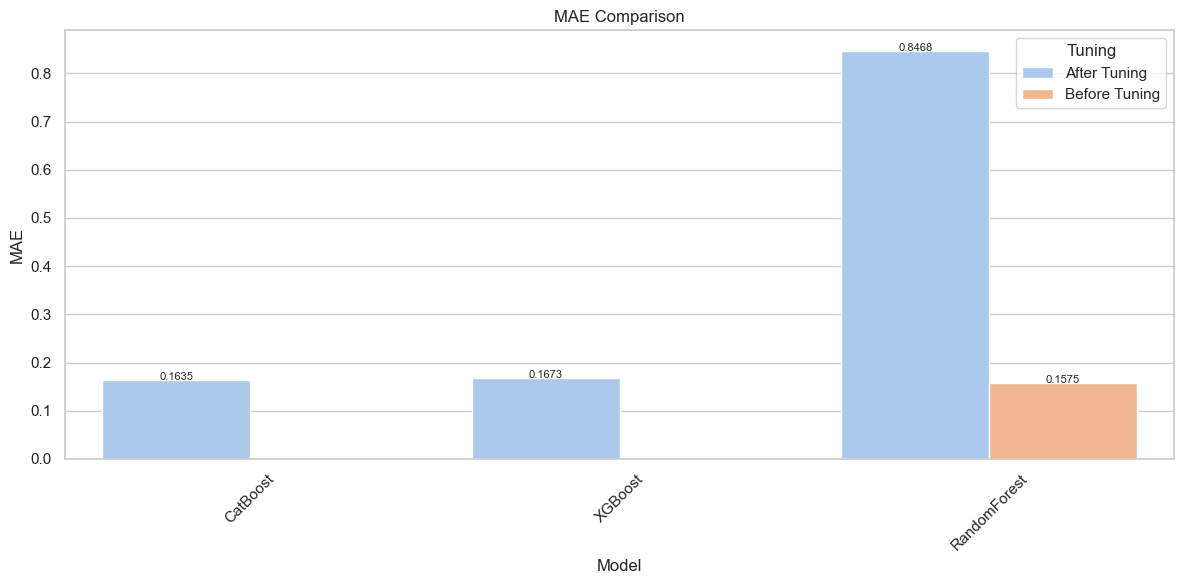

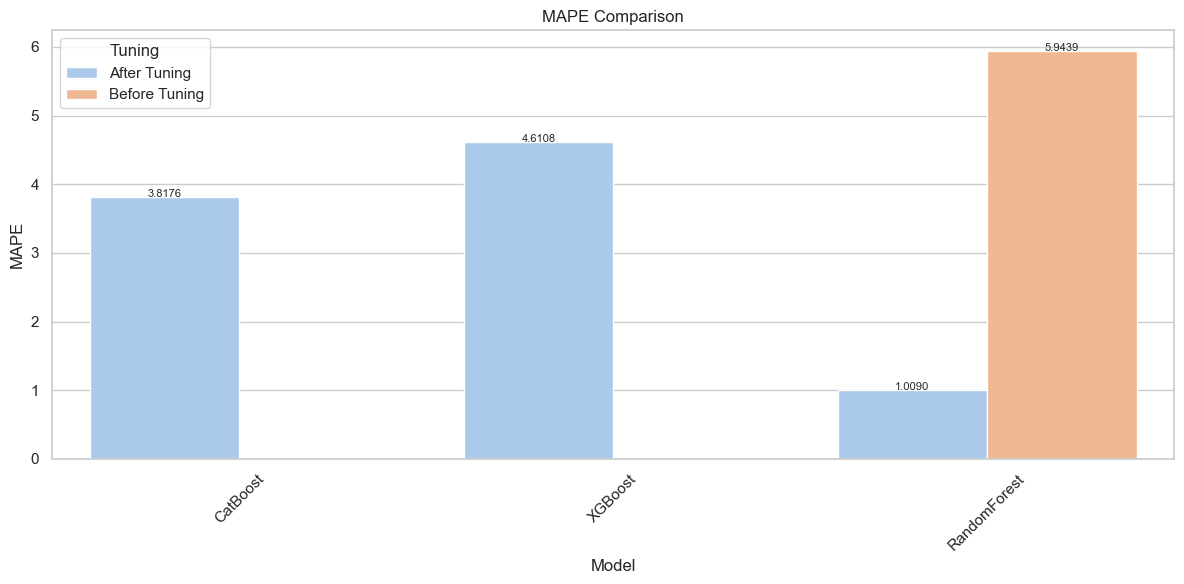

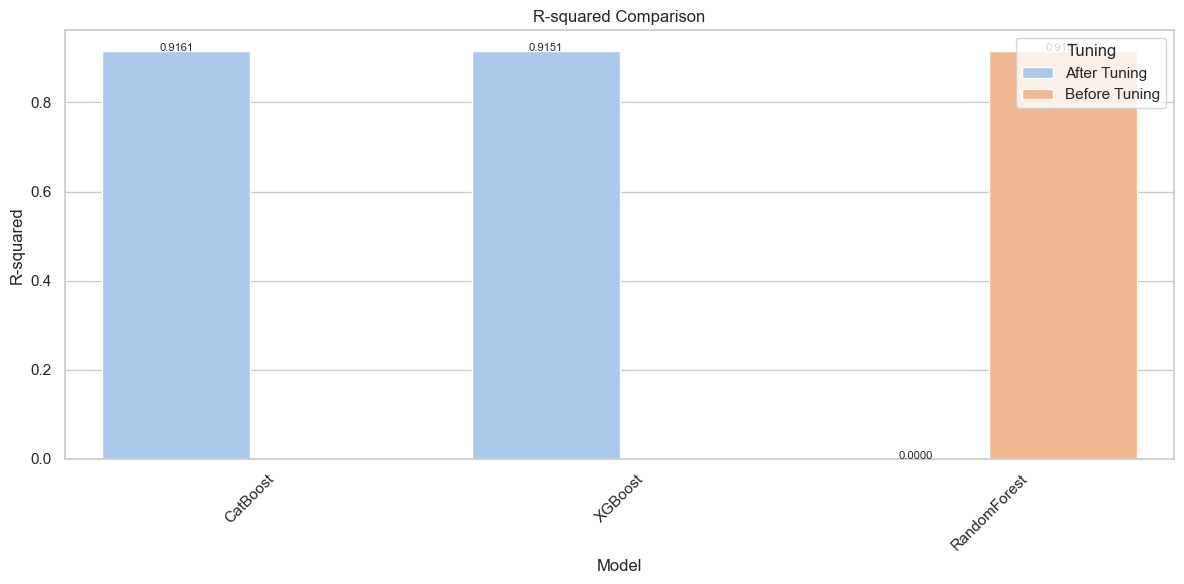

In [27]:
sns.set(style="whitegrid")

# Определение нежной палитры цветов
palette = sns.color_palette("pastel")

# Фильтрация данных для каждой метрики
df_mae = df_results[df_results['Metric'] == 'MAE']
df_mape = df_results[df_results['Metric'] == 'MAPE']
df_r2 = df_results[df_results['Metric'] == 'R-squared']

# График для MAE
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_mae, x='Model', y='Value', hue='Tuning', palette=palette)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)

plt.tight_layout()
plt.show()

# График для MAPE
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_mape, x='Model', y='Value', hue='Tuning', palette=palette)
plt.title('MAPE Comparison')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.legend(title='Tuning')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)

plt.tight_layout()
plt.show()

# График для R-squared
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_r2, x='Model', y='Value', hue='Tuning', palette=palette)
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.legend(title='Tuning')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8)

plt.tight_layout()
plt.show()

# Others Methods

In [35]:
def nested_cross_validation(X_train, y_train_sc, models, scoring_metrics):
    results = {}
    
    for model_name, model in models.items():
        model_results = {}
        
        for metric_name, scoring_metric in scoring_metrics.items():
            # Perform outer cross-validation for performance estimation
            outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
            
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=ConvergenceWarning)
                scores = cross_val_score(model, X, y, scoring=scoring_metric, cv=outer_cv)
            
            model_results[metric_name] = scores.mean()  # Calculate the mean of the cross-validated scores
            
        results[model_name] = model_results
        
    return results

In [36]:
# Initialize the regression models
linear_model = LinearRegression()
elasticnet_model = ElasticNet()
random_forest = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
catboost_model = CatBoostRegressor()
svm_model = SVR()
knn_model = KNeighborsRegressor()

# Create a dictionary of models
models = {
    'Linear Regression': linear_model,
    'ElasticNet Regression': elasticnet_model,
    'Random Forest Regression': random_forest,
    'XGBoost Regression': xgb_model,
    'LightGBM Regression': lgbm_model,
    'CatBoost Regression': catboost_model,
    'SVM': svm_model,
    'KNN': knn_model
}

# Define the scoring metrics (e.g., 'neg_mean_squared_error', 'r2', 'neg_mean_absolute_error')
scoring_metrics = {'MSE': 'neg_mean_squared_error', 'R2': make_scorer(r2_score), 'MAE': 'neg_mean_absolute_error'}

# Perform nested cross-validation
results = nested_cross_validation(X, y, models, scoring_metrics)

# Print the evaluation results
for model_name, metrics in results.items():
    print(model_name + " Scores:")
    for metric_name, score in metrics.items():
        print(metric_name + ":")
        print("Mean:", score)
        print()

Learning rate set to 0.064033
0:	learn: 32.7015239	total: 6.56ms	remaining: 6.55s
1:	learn: 31.2809211	total: 12ms	remaining: 5.99s
2:	learn: 29.8896162	total: 17.2ms	remaining: 5.72s
3:	learn: 28.6628855	total: 22.4ms	remaining: 5.57s
4:	learn: 27.5793113	total: 27.7ms	remaining: 5.52s
5:	learn: 26.5156101	total: 33ms	remaining: 5.47s
6:	learn: 25.4925977	total: 38.1ms	remaining: 5.4s
7:	learn: 24.5777759	total: 43ms	remaining: 5.34s
8:	learn: 23.7658500	total: 48ms	remaining: 5.29s
9:	learn: 23.0139639	total: 52.9ms	remaining: 5.24s
10:	learn: 22.2874876	total: 58ms	remaining: 5.21s
11:	learn: 21.6422377	total: 62.8ms	remaining: 5.17s
12:	learn: 21.0237280	total: 67.7ms	remaining: 5.14s
13:	learn: 20.4609120	total: 72.6ms	remaining: 5.11s
14:	learn: 19.9579289	total: 77.4ms	remaining: 5.08s
15:	learn: 19.5200409	total: 82.2ms	remaining: 5.06s
16:	learn: 19.1026171	total: 87ms	remaining: 5.03s
17:	learn: 18.7189858	total: 91.8ms	remaining: 5.01s
18:	learn: 18.3277126	total: 96.6ms	rem

177:	learn: 11.0610626	total: 1000ms	remaining: 4.62s
178:	learn: 11.0548859	total: 1s	remaining: 4.61s
179:	learn: 11.0449792	total: 1.01s	remaining: 4.61s
180:	learn: 11.0339041	total: 1.02s	remaining: 4.6s
181:	learn: 11.0230891	total: 1.02s	remaining: 4.6s
182:	learn: 11.0039413	total: 1.03s	remaining: 4.59s
183:	learn: 10.9944126	total: 1.03s	remaining: 4.59s
184:	learn: 10.9814895	total: 1.04s	remaining: 4.58s
185:	learn: 10.9662581	total: 1.04s	remaining: 4.58s
186:	learn: 10.9535397	total: 1.05s	remaining: 4.57s
187:	learn: 10.9366026	total: 1.06s	remaining: 4.57s
188:	learn: 10.9255368	total: 1.06s	remaining: 4.56s
189:	learn: 10.9143864	total: 1.07s	remaining: 4.55s
190:	learn: 10.9026981	total: 1.07s	remaining: 4.55s
191:	learn: 10.8950445	total: 1.08s	remaining: 4.54s
192:	learn: 10.8818374	total: 1.08s	remaining: 4.54s
193:	learn: 10.8728964	total: 1.09s	remaining: 4.53s
194:	learn: 10.8622032	total: 1.1s	remaining: 4.53s
195:	learn: 10.8467849	total: 1.1s	remaining: 4.52s

353:	learn: 9.5891460	total: 2.02s	remaining: 3.68s
354:	learn: 9.5834410	total: 2.02s	remaining: 3.68s
355:	learn: 9.5783846	total: 2.03s	remaining: 3.67s
356:	learn: 9.5711432	total: 2.04s	remaining: 3.67s
357:	learn: 9.5643022	total: 2.04s	remaining: 3.66s
358:	learn: 9.5539794	total: 2.05s	remaining: 3.66s
359:	learn: 9.5497223	total: 2.05s	remaining: 3.65s
360:	learn: 9.5435322	total: 2.06s	remaining: 3.65s
361:	learn: 9.5398200	total: 2.06s	remaining: 3.64s
362:	learn: 9.5365550	total: 2.07s	remaining: 3.63s
363:	learn: 9.5310958	total: 2.08s	remaining: 3.63s
364:	learn: 9.5249537	total: 2.08s	remaining: 3.62s
365:	learn: 9.5200643	total: 2.09s	remaining: 3.62s
366:	learn: 9.5145118	total: 2.09s	remaining: 3.61s
367:	learn: 9.5070736	total: 2.1s	remaining: 3.6s
368:	learn: 9.5014048	total: 2.1s	remaining: 3.6s
369:	learn: 9.4994508	total: 2.11s	remaining: 3.59s
370:	learn: 9.4964350	total: 2.12s	remaining: 3.59s
371:	learn: 9.4898691	total: 2.12s	remaining: 3.58s
372:	learn: 9.48

550:	learn: 8.6937480	total: 3.03s	remaining: 2.47s
551:	learn: 8.6886506	total: 3.03s	remaining: 2.46s
552:	learn: 8.6862949	total: 3.04s	remaining: 2.46s
553:	learn: 8.6798080	total: 3.04s	remaining: 2.45s
554:	learn: 8.6762845	total: 3.05s	remaining: 2.44s
555:	learn: 8.6738047	total: 3.06s	remaining: 2.44s
556:	learn: 8.6700524	total: 3.06s	remaining: 2.43s
557:	learn: 8.6687118	total: 3.06s	remaining: 2.43s
558:	learn: 8.6635471	total: 3.07s	remaining: 2.42s
559:	learn: 8.6602401	total: 3.07s	remaining: 2.42s
560:	learn: 8.6553665	total: 3.08s	remaining: 2.41s
561:	learn: 8.6515550	total: 3.08s	remaining: 2.4s
562:	learn: 8.6481697	total: 3.09s	remaining: 2.4s
563:	learn: 8.6456274	total: 3.09s	remaining: 2.39s
564:	learn: 8.6416098	total: 3.1s	remaining: 2.39s
565:	learn: 8.6385465	total: 3.1s	remaining: 2.38s
566:	learn: 8.6378492	total: 3.11s	remaining: 2.37s
567:	learn: 8.6368079	total: 3.11s	remaining: 2.37s
568:	learn: 8.6315596	total: 3.12s	remaining: 2.36s
569:	learn: 8.62

748:	learn: 8.0525333	total: 4.03s	remaining: 1.35s
749:	learn: 8.0497566	total: 4.04s	remaining: 1.35s
750:	learn: 8.0468451	total: 4.04s	remaining: 1.34s
751:	learn: 8.0441580	total: 4.05s	remaining: 1.33s
752:	learn: 8.0429531	total: 4.05s	remaining: 1.33s
753:	learn: 8.0417321	total: 4.06s	remaining: 1.32s
754:	learn: 8.0370372	total: 4.07s	remaining: 1.32s
755:	learn: 8.0326390	total: 4.07s	remaining: 1.31s
756:	learn: 8.0288662	total: 4.08s	remaining: 1.31s
757:	learn: 8.0260599	total: 4.08s	remaining: 1.3s
758:	learn: 8.0233647	total: 4.09s	remaining: 1.3s
759:	learn: 8.0209307	total: 4.09s	remaining: 1.29s
760:	learn: 8.0199456	total: 4.1s	remaining: 1.29s
761:	learn: 8.0184863	total: 4.1s	remaining: 1.28s
762:	learn: 8.0165893	total: 4.11s	remaining: 1.27s
763:	learn: 8.0134994	total: 4.11s	remaining: 1.27s
764:	learn: 8.0087563	total: 4.12s	remaining: 1.26s
765:	learn: 8.0077971	total: 4.12s	remaining: 1.26s
766:	learn: 8.0048119	total: 4.13s	remaining: 1.25s
767:	learn: 8.00

913:	learn: 7.6785269	total: 4.87s	remaining: 458ms
914:	learn: 7.6766829	total: 4.87s	remaining: 453ms
915:	learn: 7.6751879	total: 4.88s	remaining: 447ms
916:	learn: 7.6740615	total: 4.88s	remaining: 442ms
917:	learn: 7.6718546	total: 4.89s	remaining: 437ms
918:	learn: 7.6702761	total: 4.89s	remaining: 431ms
919:	learn: 7.6682733	total: 4.9s	remaining: 426ms
920:	learn: 7.6648203	total: 4.9s	remaining: 421ms
921:	learn: 7.6631498	total: 4.91s	remaining: 415ms
922:	learn: 7.6596610	total: 4.91s	remaining: 410ms
923:	learn: 7.6578353	total: 4.92s	remaining: 405ms
924:	learn: 7.6566671	total: 4.92s	remaining: 399ms
925:	learn: 7.6541504	total: 4.93s	remaining: 394ms
926:	learn: 7.6516001	total: 4.93s	remaining: 389ms
927:	learn: 7.6497134	total: 4.94s	remaining: 383ms
928:	learn: 7.6484520	total: 4.94s	remaining: 378ms
929:	learn: 7.6471466	total: 4.95s	remaining: 373ms
930:	learn: 7.6453952	total: 4.95s	remaining: 367ms
931:	learn: 7.6440917	total: 4.96s	remaining: 362ms
932:	learn: 7.

76:	learn: 12.6833413	total: 403ms	remaining: 4.84s
77:	learn: 12.6431588	total: 409ms	remaining: 4.84s
78:	learn: 12.6284780	total: 418ms	remaining: 4.87s
79:	learn: 12.6113798	total: 424ms	remaining: 4.87s
80:	learn: 12.5902787	total: 429ms	remaining: 4.87s
81:	learn: 12.5620481	total: 434ms	remaining: 4.86s
82:	learn: 12.5468078	total: 440ms	remaining: 4.86s
83:	learn: 12.5278141	total: 445ms	remaining: 4.85s
84:	learn: 12.4982996	total: 450ms	remaining: 4.84s
85:	learn: 12.4797636	total: 455ms	remaining: 4.83s
86:	learn: 12.4580231	total: 460ms	remaining: 4.83s
87:	learn: 12.4321173	total: 465ms	remaining: 4.82s
88:	learn: 12.4082176	total: 470ms	remaining: 4.81s
89:	learn: 12.3897569	total: 475ms	remaining: 4.8s
90:	learn: 12.3740006	total: 480ms	remaining: 4.79s
91:	learn: 12.3393241	total: 485ms	remaining: 4.79s
92:	learn: 12.3110106	total: 490ms	remaining: 4.78s
93:	learn: 12.2948887	total: 495ms	remaining: 4.77s
94:	learn: 12.2739450	total: 500ms	remaining: 4.76s
95:	learn: 12

235:	learn: 10.4186921	total: 1.23s	remaining: 3.97s
236:	learn: 10.4063959	total: 1.23s	remaining: 3.96s
237:	learn: 10.4009826	total: 1.24s	remaining: 3.96s
238:	learn: 10.3944085	total: 1.24s	remaining: 3.96s
239:	learn: 10.3854993	total: 1.25s	remaining: 3.95s
240:	learn: 10.3714774	total: 1.25s	remaining: 3.94s
241:	learn: 10.3590358	total: 1.26s	remaining: 3.94s
242:	learn: 10.3447523	total: 1.26s	remaining: 3.93s
243:	learn: 10.3346611	total: 1.27s	remaining: 3.92s
244:	learn: 10.3229865	total: 1.27s	remaining: 3.92s
245:	learn: 10.3108720	total: 1.28s	remaining: 3.91s
246:	learn: 10.3041093	total: 1.28s	remaining: 3.91s
247:	learn: 10.2964306	total: 1.29s	remaining: 3.9s
248:	learn: 10.2886609	total: 1.29s	remaining: 3.9s
249:	learn: 10.2831888	total: 1.3s	remaining: 3.89s
250:	learn: 10.2750835	total: 1.3s	remaining: 3.89s
251:	learn: 10.2662884	total: 1.31s	remaining: 3.88s
252:	learn: 10.2585086	total: 1.31s	remaining: 3.88s
253:	learn: 10.2481230	total: 1.32s	remaining: 3.8

430:	learn: 9.0930055	total: 2.22s	remaining: 2.94s
431:	learn: 9.0869593	total: 2.23s	remaining: 2.93s
432:	learn: 9.0842196	total: 2.23s	remaining: 2.93s
433:	learn: 9.0765274	total: 2.24s	remaining: 2.92s
434:	learn: 9.0735334	total: 2.25s	remaining: 2.92s
435:	learn: 9.0678971	total: 2.25s	remaining: 2.91s
436:	learn: 9.0615512	total: 2.26s	remaining: 2.91s
437:	learn: 9.0573481	total: 2.26s	remaining: 2.9s
438:	learn: 9.0514925	total: 2.27s	remaining: 2.9s
439:	learn: 9.0502159	total: 2.27s	remaining: 2.89s
440:	learn: 9.0432959	total: 2.27s	remaining: 2.88s
441:	learn: 9.0390041	total: 2.28s	remaining: 2.88s
442:	learn: 9.0345491	total: 2.29s	remaining: 2.87s
443:	learn: 9.0309036	total: 2.29s	remaining: 2.87s
444:	learn: 9.0252929	total: 2.3s	remaining: 2.86s
445:	learn: 9.0218090	total: 2.3s	remaining: 2.86s
446:	learn: 9.0189299	total: 2.31s	remaining: 2.85s
447:	learn: 9.0176793	total: 2.31s	remaining: 2.85s
448:	learn: 9.0143013	total: 2.32s	remaining: 2.84s
449:	learn: 9.01

591:	learn: 8.4409769	total: 3.05s	remaining: 2.1s
592:	learn: 8.4390812	total: 3.05s	remaining: 2.1s
593:	learn: 8.4322791	total: 3.06s	remaining: 2.09s
594:	learn: 8.4297173	total: 3.06s	remaining: 2.08s
595:	learn: 8.4264289	total: 3.07s	remaining: 2.08s
596:	learn: 8.4208388	total: 3.07s	remaining: 2.08s
597:	learn: 8.4158120	total: 3.08s	remaining: 2.07s
598:	learn: 8.4143879	total: 3.08s	remaining: 2.06s
599:	learn: 8.4113965	total: 3.09s	remaining: 2.06s
600:	learn: 8.4097183	total: 3.09s	remaining: 2.05s
601:	learn: 8.4074223	total: 3.1s	remaining: 2.05s
602:	learn: 8.4045163	total: 3.1s	remaining: 2.04s
603:	learn: 8.4002586	total: 3.11s	remaining: 2.04s
604:	learn: 8.3960385	total: 3.11s	remaining: 2.03s
605:	learn: 8.3932197	total: 3.12s	remaining: 2.03s
606:	learn: 8.3885620	total: 3.13s	remaining: 2.02s
607:	learn: 8.3836229	total: 3.13s	remaining: 2.02s
608:	learn: 8.3804641	total: 3.13s	remaining: 2.01s
609:	learn: 8.3760256	total: 3.14s	remaining: 2.01s
610:	learn: 8.37

752:	learn: 7.9577771	total: 3.87s	remaining: 1.27s
753:	learn: 7.9547730	total: 3.87s	remaining: 1.26s
754:	learn: 7.9541447	total: 3.88s	remaining: 1.26s
755:	learn: 7.9522932	total: 3.88s	remaining: 1.25s
756:	learn: 7.9487414	total: 3.89s	remaining: 1.25s
757:	learn: 7.9469072	total: 3.89s	remaining: 1.24s
758:	learn: 7.9426230	total: 3.9s	remaining: 1.24s
759:	learn: 7.9391521	total: 3.9s	remaining: 1.23s
760:	learn: 7.9369203	total: 3.91s	remaining: 1.23s
761:	learn: 7.9348932	total: 3.91s	remaining: 1.22s
762:	learn: 7.9297977	total: 3.92s	remaining: 1.22s
763:	learn: 7.9269176	total: 3.92s	remaining: 1.21s
764:	learn: 7.9229835	total: 3.93s	remaining: 1.21s
765:	learn: 7.9193283	total: 3.94s	remaining: 1.2s
766:	learn: 7.9174122	total: 3.94s	remaining: 1.2s
767:	learn: 7.9150845	total: 3.95s	remaining: 1.19s
768:	learn: 7.9128762	total: 3.95s	remaining: 1.19s
769:	learn: 7.9099546	total: 3.96s	remaining: 1.18s
770:	learn: 7.9070540	total: 3.96s	remaining: 1.18s
771:	learn: 7.90

949:	learn: 7.4941030	total: 4.87s	remaining: 256ms
950:	learn: 7.4916533	total: 4.88s	remaining: 251ms
951:	learn: 7.4888777	total: 4.88s	remaining: 246ms
952:	learn: 7.4874334	total: 4.89s	remaining: 241ms
953:	learn: 7.4844315	total: 4.89s	remaining: 236ms
954:	learn: 7.4812418	total: 4.9s	remaining: 231ms
955:	learn: 7.4792789	total: 4.9s	remaining: 226ms
956:	learn: 7.4776241	total: 4.91s	remaining: 221ms
957:	learn: 7.4757085	total: 4.91s	remaining: 215ms
958:	learn: 7.4740643	total: 4.92s	remaining: 210ms
959:	learn: 7.4722072	total: 4.92s	remaining: 205ms
960:	learn: 7.4698485	total: 4.93s	remaining: 200ms
961:	learn: 7.4681018	total: 4.93s	remaining: 195ms
962:	learn: 7.4669459	total: 4.94s	remaining: 190ms
963:	learn: 7.4640205	total: 4.95s	remaining: 185ms
964:	learn: 7.4613322	total: 4.95s	remaining: 180ms
965:	learn: 7.4598530	total: 4.96s	remaining: 174ms
966:	learn: 7.4586569	total: 4.96s	remaining: 169ms
967:	learn: 7.4562308	total: 4.96s	remaining: 164ms
968:	learn: 7.

117:	learn: 11.8720477	total: 614ms	remaining: 4.59s
118:	learn: 11.8502879	total: 620ms	remaining: 4.59s
119:	learn: 11.8335552	total: 626ms	remaining: 4.59s
120:	learn: 11.8108594	total: 632ms	remaining: 4.59s
121:	learn: 11.8028238	total: 637ms	remaining: 4.58s
122:	learn: 11.7808216	total: 642ms	remaining: 4.58s
123:	learn: 11.7721964	total: 648ms	remaining: 4.57s
124:	learn: 11.7537350	total: 653ms	remaining: 4.57s
125:	learn: 11.7425290	total: 658ms	remaining: 4.57s
126:	learn: 11.7303052	total: 664ms	remaining: 4.56s
127:	learn: 11.7118710	total: 669ms	remaining: 4.56s
128:	learn: 11.6990167	total: 674ms	remaining: 4.55s
129:	learn: 11.6805878	total: 679ms	remaining: 4.54s
130:	learn: 11.6637142	total: 685ms	remaining: 4.54s
131:	learn: 11.6477897	total: 690ms	remaining: 4.53s
132:	learn: 11.6317401	total: 695ms	remaining: 4.53s
133:	learn: 11.6249062	total: 700ms	remaining: 4.52s
134:	learn: 11.6109704	total: 705ms	remaining: 4.52s
135:	learn: 11.5998050	total: 711ms	remaining:

276:	learn: 10.0347072	total: 1.43s	remaining: 3.74s
277:	learn: 10.0312884	total: 1.44s	remaining: 3.74s
278:	learn: 10.0208048	total: 1.45s	remaining: 3.73s
279:	learn: 10.0104716	total: 1.45s	remaining: 3.73s
280:	learn: 10.0036795	total: 1.46s	remaining: 3.73s
281:	learn: 9.9944850	total: 1.46s	remaining: 3.72s
282:	learn: 9.9853370	total: 1.47s	remaining: 3.72s
283:	learn: 9.9745038	total: 1.47s	remaining: 3.71s
284:	learn: 9.9669519	total: 1.48s	remaining: 3.71s
285:	learn: 9.9557085	total: 1.48s	remaining: 3.7s
286:	learn: 9.9520403	total: 1.49s	remaining: 3.7s
287:	learn: 9.9483903	total: 1.49s	remaining: 3.69s
288:	learn: 9.9435071	total: 1.5s	remaining: 3.69s
289:	learn: 9.9397265	total: 1.5s	remaining: 3.68s
290:	learn: 9.9283973	total: 1.51s	remaining: 3.67s
291:	learn: 9.9172902	total: 1.51s	remaining: 3.67s
292:	learn: 9.9051420	total: 1.52s	remaining: 3.66s
293:	learn: 9.8983521	total: 1.52s	remaining: 3.66s
294:	learn: 9.8882457	total: 1.53s	remaining: 3.65s
295:	learn:

473:	learn: 8.8657628	total: 2.44s	remaining: 2.7s
474:	learn: 8.8614929	total: 2.44s	remaining: 2.7s
475:	learn: 8.8583641	total: 2.45s	remaining: 2.69s
476:	learn: 8.8528124	total: 2.45s	remaining: 2.69s
477:	learn: 8.8487448	total: 2.46s	remaining: 2.69s
478:	learn: 8.8441770	total: 2.46s	remaining: 2.68s
479:	learn: 8.8403773	total: 2.47s	remaining: 2.67s
480:	learn: 8.8355774	total: 2.47s	remaining: 2.67s
481:	learn: 8.8319976	total: 2.48s	remaining: 2.67s
482:	learn: 8.8290169	total: 2.48s	remaining: 2.66s
483:	learn: 8.8257410	total: 2.49s	remaining: 2.65s
484:	learn: 8.8222898	total: 2.49s	remaining: 2.65s
485:	learn: 8.8161828	total: 2.5s	remaining: 2.64s
486:	learn: 8.8115539	total: 2.5s	remaining: 2.64s
487:	learn: 8.8064313	total: 2.51s	remaining: 2.63s
488:	learn: 8.8047874	total: 2.52s	remaining: 2.63s
489:	learn: 8.8023386	total: 2.52s	remaining: 2.62s
490:	learn: 8.7983746	total: 2.52s	remaining: 2.62s
491:	learn: 8.7938372	total: 2.53s	remaining: 2.61s
492:	learn: 8.79

635:	learn: 8.2537679	total: 3.27s	remaining: 1.87s
636:	learn: 8.2504528	total: 3.27s	remaining: 1.86s
637:	learn: 8.2475892	total: 3.28s	remaining: 1.86s
638:	learn: 8.2436664	total: 3.28s	remaining: 1.85s
639:	learn: 8.2398733	total: 3.29s	remaining: 1.85s
640:	learn: 8.2347100	total: 3.29s	remaining: 1.84s
641:	learn: 8.2306059	total: 3.3s	remaining: 1.84s
642:	learn: 8.2274343	total: 3.3s	remaining: 1.83s
643:	learn: 8.2246088	total: 3.31s	remaining: 1.83s
644:	learn: 8.2221744	total: 3.31s	remaining: 1.82s
645:	learn: 8.2183581	total: 3.32s	remaining: 1.82s
646:	learn: 8.2124936	total: 3.32s	remaining: 1.81s
647:	learn: 8.2077732	total: 3.33s	remaining: 1.81s
648:	learn: 8.2043066	total: 3.33s	remaining: 1.8s
649:	learn: 8.2017379	total: 3.34s	remaining: 1.8s
650:	learn: 8.1981283	total: 3.34s	remaining: 1.79s
651:	learn: 8.1943415	total: 3.35s	remaining: 1.79s
652:	learn: 8.1928533	total: 3.35s	remaining: 1.78s
653:	learn: 8.1906287	total: 3.36s	remaining: 1.78s
654:	learn: 8.18

798:	learn: 7.7897389	total: 4.1s	remaining: 1.03s
799:	learn: 7.7868194	total: 4.11s	remaining: 1.03s
800:	learn: 7.7836511	total: 4.12s	remaining: 1.02s
801:	learn: 7.7821813	total: 4.12s	remaining: 1.02s
802:	learn: 7.7810020	total: 4.13s	remaining: 1.01s
803:	learn: 7.7787622	total: 4.13s	remaining: 1.01s
804:	learn: 7.7770596	total: 4.14s	remaining: 1s
805:	learn: 7.7742209	total: 4.14s	remaining: 997ms
806:	learn: 7.7717165	total: 4.15s	remaining: 992ms
807:	learn: 7.7703270	total: 4.15s	remaining: 987ms
808:	learn: 7.7693032	total: 4.16s	remaining: 981ms
809:	learn: 7.7657393	total: 4.16s	remaining: 976ms
810:	learn: 7.7645513	total: 4.17s	remaining: 971ms
811:	learn: 7.7603678	total: 4.17s	remaining: 966ms
812:	learn: 7.7573999	total: 4.18s	remaining: 961ms
813:	learn: 7.7546261	total: 4.18s	remaining: 956ms
814:	learn: 7.7532542	total: 4.19s	remaining: 951ms
815:	learn: 7.7511660	total: 4.19s	remaining: 945ms
816:	learn: 7.7474236	total: 4.2s	remaining: 940ms
817:	learn: 7.745

958:	learn: 7.4442509	total: 4.92s	remaining: 211ms
959:	learn: 7.4422165	total: 4.93s	remaining: 205ms
960:	learn: 7.4401770	total: 4.94s	remaining: 200ms
961:	learn: 7.4392190	total: 4.94s	remaining: 195ms
962:	learn: 7.4356255	total: 4.95s	remaining: 190ms
963:	learn: 7.4350362	total: 4.95s	remaining: 185ms
964:	learn: 7.4334148	total: 4.96s	remaining: 180ms
965:	learn: 7.4314152	total: 4.96s	remaining: 175ms
966:	learn: 7.4292628	total: 4.97s	remaining: 170ms
967:	learn: 7.4274164	total: 4.97s	remaining: 164ms
968:	learn: 7.4246549	total: 4.98s	remaining: 159ms
969:	learn: 7.4225221	total: 4.98s	remaining: 154ms
970:	learn: 7.4194637	total: 4.99s	remaining: 149ms
971:	learn: 7.4182198	total: 5s	remaining: 144ms
972:	learn: 7.4161848	total: 5s	remaining: 139ms
973:	learn: 7.4141510	total: 5.01s	remaining: 134ms
974:	learn: 7.4132183	total: 5.01s	remaining: 129ms
975:	learn: 7.4122775	total: 5.02s	remaining: 123ms
976:	learn: 7.4098148	total: 5.02s	remaining: 118ms
977:	learn: 7.4073

135:	learn: 11.6550898	total: 804ms	remaining: 5.1s
136:	learn: 11.6321285	total: 810ms	remaining: 5.1s
137:	learn: 11.6149801	total: 816ms	remaining: 5.1s
138:	learn: 11.5976112	total: 822ms	remaining: 5.09s
139:	learn: 11.5801585	total: 828ms	remaining: 5.08s
140:	learn: 11.5675321	total: 833ms	remaining: 5.08s
141:	learn: 11.5504488	total: 839ms	remaining: 5.07s
142:	learn: 11.5344134	total: 845ms	remaining: 5.06s
143:	learn: 11.5243890	total: 851ms	remaining: 5.06s
144:	learn: 11.5048380	total: 856ms	remaining: 5.05s
145:	learn: 11.4964000	total: 862ms	remaining: 5.04s
146:	learn: 11.4857800	total: 868ms	remaining: 5.04s
147:	learn: 11.4705016	total: 874ms	remaining: 5.03s
148:	learn: 11.4587394	total: 880ms	remaining: 5.03s
149:	learn: 11.4463246	total: 885ms	remaining: 5.02s
150:	learn: 11.4305717	total: 891ms	remaining: 5.01s
151:	learn: 11.4127151	total: 897ms	remaining: 5s
152:	learn: 11.3899425	total: 903ms	remaining: 5s
153:	learn: 11.3789788	total: 909ms	remaining: 4.99s
15

330:	learn: 9.7069064	total: 1.84s	remaining: 3.71s
331:	learn: 9.7025658	total: 1.84s	remaining: 3.71s
332:	learn: 9.6964590	total: 1.85s	remaining: 3.7s
333:	learn: 9.6882529	total: 1.85s	remaining: 3.7s
334:	learn: 9.6846983	total: 1.86s	remaining: 3.69s
335:	learn: 9.6784603	total: 1.86s	remaining: 3.69s
336:	learn: 9.6702655	total: 1.87s	remaining: 3.68s
337:	learn: 9.6654950	total: 1.88s	remaining: 3.67s
338:	learn: 9.6609861	total: 1.88s	remaining: 3.67s
339:	learn: 9.6552348	total: 1.89s	remaining: 3.66s
340:	learn: 9.6467794	total: 1.89s	remaining: 3.65s
341:	learn: 9.6423008	total: 1.9s	remaining: 3.65s
342:	learn: 9.6363222	total: 1.9s	remaining: 3.64s
343:	learn: 9.6329209	total: 1.91s	remaining: 3.63s
344:	learn: 9.6280190	total: 1.91s	remaining: 3.63s
345:	learn: 9.6208195	total: 1.92s	remaining: 3.62s
346:	learn: 9.6142134	total: 1.92s	remaining: 3.61s
347:	learn: 9.6111054	total: 1.93s	remaining: 3.61s
348:	learn: 9.6025969	total: 1.93s	remaining: 3.6s
349:	learn: 9.594

489:	learn: 8.8805531	total: 2.65s	remaining: 2.76s
490:	learn: 8.8766912	total: 2.66s	remaining: 2.75s
491:	learn: 8.8728854	total: 2.66s	remaining: 2.75s
492:	learn: 8.8677586	total: 2.67s	remaining: 2.75s
493:	learn: 8.8635302	total: 2.67s	remaining: 2.74s
494:	learn: 8.8617206	total: 2.68s	remaining: 2.73s
495:	learn: 8.8559549	total: 2.69s	remaining: 2.73s
496:	learn: 8.8530043	total: 2.69s	remaining: 2.72s
497:	learn: 8.8477284	total: 2.69s	remaining: 2.72s
498:	learn: 8.8447941	total: 2.7s	remaining: 2.71s
499:	learn: 8.8413809	total: 2.71s	remaining: 2.71s
500:	learn: 8.8371113	total: 2.71s	remaining: 2.7s
501:	learn: 8.8325376	total: 2.72s	remaining: 2.69s
502:	learn: 8.8263550	total: 2.72s	remaining: 2.69s
503:	learn: 8.8238469	total: 2.73s	remaining: 2.68s
504:	learn: 8.8189574	total: 2.73s	remaining: 2.68s
505:	learn: 8.8130925	total: 2.73s	remaining: 2.67s
506:	learn: 8.8104447	total: 2.74s	remaining: 2.67s
507:	learn: 8.8065662	total: 2.75s	remaining: 2.66s
508:	learn: 8.

649:	learn: 8.3016053	total: 3.47s	remaining: 1.87s
650:	learn: 8.2972937	total: 3.48s	remaining: 1.86s
651:	learn: 8.2940466	total: 3.48s	remaining: 1.86s
652:	learn: 8.2916753	total: 3.49s	remaining: 1.85s
653:	learn: 8.2864464	total: 3.49s	remaining: 1.85s
654:	learn: 8.2850699	total: 3.5s	remaining: 1.84s
655:	learn: 8.2794253	total: 3.5s	remaining: 1.84s
656:	learn: 8.2768294	total: 3.51s	remaining: 1.83s
657:	learn: 8.2728388	total: 3.51s	remaining: 1.82s
658:	learn: 8.2712899	total: 3.52s	remaining: 1.82s
659:	learn: 8.2672314	total: 3.52s	remaining: 1.81s
660:	learn: 8.2601476	total: 3.53s	remaining: 1.81s
661:	learn: 8.2579177	total: 3.53s	remaining: 1.8s
662:	learn: 8.2535992	total: 3.54s	remaining: 1.8s
663:	learn: 8.2479836	total: 3.54s	remaining: 1.79s
664:	learn: 8.2434647	total: 3.55s	remaining: 1.79s
665:	learn: 8.2391051	total: 3.55s	remaining: 1.78s
666:	learn: 8.2361439	total: 3.56s	remaining: 1.78s
667:	learn: 8.2315780	total: 3.56s	remaining: 1.77s
668:	learn: 8.22

846:	learn: 7.7671196	total: 4.48s	remaining: 810ms
847:	learn: 7.7623160	total: 4.49s	remaining: 805ms
848:	learn: 7.7582643	total: 4.5s	remaining: 800ms
849:	learn: 7.7562909	total: 4.5s	remaining: 794ms
850:	learn: 7.7532629	total: 4.51s	remaining: 789ms
851:	learn: 7.7512435	total: 4.51s	remaining: 784ms
852:	learn: 7.7463567	total: 4.52s	remaining: 778ms
853:	learn: 7.7434439	total: 4.52s	remaining: 773ms
854:	learn: 7.7424437	total: 4.53s	remaining: 768ms
855:	learn: 7.7408953	total: 4.53s	remaining: 762ms
856:	learn: 7.7361575	total: 4.54s	remaining: 757ms
857:	learn: 7.7335889	total: 4.54s	remaining: 752ms
858:	learn: 7.7311949	total: 4.55s	remaining: 747ms
859:	learn: 7.7294435	total: 4.55s	remaining: 741ms
860:	learn: 7.7270715	total: 4.56s	remaining: 736ms
861:	learn: 7.7251460	total: 4.56s	remaining: 731ms
862:	learn: 7.7225680	total: 4.57s	remaining: 725ms
863:	learn: 7.7204262	total: 4.57s	remaining: 720ms
864:	learn: 7.7179058	total: 4.58s	remaining: 715ms
865:	learn: 7.

38:	learn: 14.5322520	total: 201ms	remaining: 4.95s
39:	learn: 14.4384209	total: 207ms	remaining: 4.97s
40:	learn: 14.3679648	total: 215ms	remaining: 5.02s
41:	learn: 14.3004658	total: 221ms	remaining: 5.05s
42:	learn: 14.2225233	total: 227ms	remaining: 5.06s
43:	learn: 14.1525533	total: 233ms	remaining: 5.05s
44:	learn: 14.0873947	total: 238ms	remaining: 5.05s
45:	learn: 14.0260400	total: 243ms	remaining: 5.04s
46:	learn: 13.9777268	total: 248ms	remaining: 5.02s
47:	learn: 13.9156488	total: 253ms	remaining: 5.02s
48:	learn: 13.8566368	total: 258ms	remaining: 5.02s
49:	learn: 13.7838614	total: 264ms	remaining: 5.02s
50:	learn: 13.7318527	total: 270ms	remaining: 5.02s
51:	learn: 13.6783472	total: 275ms	remaining: 5.01s
52:	learn: 13.6147832	total: 280ms	remaining: 5s
53:	learn: 13.5491725	total: 285ms	remaining: 5s
54:	learn: 13.4920077	total: 290ms	remaining: 4.99s
55:	learn: 13.4371276	total: 296ms	remaining: 4.99s
56:	learn: 13.3957945	total: 301ms	remaining: 4.98s
57:	learn: 13.3751

230:	learn: 10.4357492	total: 1.21s	remaining: 4.02s
231:	learn: 10.4218262	total: 1.21s	remaining: 4.02s
232:	learn: 10.4127128	total: 1.22s	remaining: 4.02s
233:	learn: 10.4040200	total: 1.23s	remaining: 4.01s
234:	learn: 10.3942405	total: 1.23s	remaining: 4.01s
235:	learn: 10.3843056	total: 1.24s	remaining: 4s
236:	learn: 10.3770798	total: 1.24s	remaining: 4s
237:	learn: 10.3698391	total: 1.25s	remaining: 3.99s
238:	learn: 10.3607574	total: 1.25s	remaining: 3.99s
239:	learn: 10.3523925	total: 1.26s	remaining: 3.98s
240:	learn: 10.3416823	total: 1.26s	remaining: 3.98s
241:	learn: 10.3364341	total: 1.27s	remaining: 3.97s
242:	learn: 10.3255558	total: 1.27s	remaining: 3.96s
243:	learn: 10.3209185	total: 1.28s	remaining: 3.96s
244:	learn: 10.3167100	total: 1.28s	remaining: 3.95s
245:	learn: 10.3094041	total: 1.29s	remaining: 3.95s
246:	learn: 10.3053823	total: 1.29s	remaining: 3.94s
247:	learn: 10.3016528	total: 1.3s	remaining: 3.94s
248:	learn: 10.2939846	total: 1.3s	remaining: 3.93s
2

394:	learn: 9.2938623	total: 2.05s	remaining: 3.14s
395:	learn: 9.2880092	total: 2.05s	remaining: 3.13s
396:	learn: 9.2837147	total: 2.06s	remaining: 3.13s
397:	learn: 9.2764624	total: 2.06s	remaining: 3.12s
398:	learn: 9.2714120	total: 2.07s	remaining: 3.12s
399:	learn: 9.2639676	total: 2.08s	remaining: 3.11s
400:	learn: 9.2557855	total: 2.08s	remaining: 3.11s
401:	learn: 9.2500860	total: 2.08s	remaining: 3.1s
402:	learn: 9.2434016	total: 2.09s	remaining: 3.1s
403:	learn: 9.2392562	total: 2.1s	remaining: 3.09s
404:	learn: 9.2360772	total: 2.1s	remaining: 3.09s
405:	learn: 9.2300645	total: 2.11s	remaining: 3.08s
406:	learn: 9.2266881	total: 2.11s	remaining: 3.08s
407:	learn: 9.2202938	total: 2.12s	remaining: 3.07s
408:	learn: 9.2146003	total: 2.12s	remaining: 3.07s
409:	learn: 9.2092199	total: 2.13s	remaining: 3.06s
410:	learn: 9.2074654	total: 2.13s	remaining: 3.06s
411:	learn: 9.2045130	total: 2.14s	remaining: 3.05s
412:	learn: 9.2001657	total: 2.15s	remaining: 3.05s
413:	learn: 9.19

590:	learn: 8.4046178	total: 3.06s	remaining: 2.12s
591:	learn: 8.4032835	total: 3.07s	remaining: 2.12s
592:	learn: 8.3991063	total: 3.08s	remaining: 2.11s
593:	learn: 8.3946764	total: 3.08s	remaining: 2.11s
594:	learn: 8.3903333	total: 3.09s	remaining: 2.1s
595:	learn: 8.3870495	total: 3.09s	remaining: 2.1s
596:	learn: 8.3834869	total: 3.1s	remaining: 2.09s
597:	learn: 8.3826032	total: 3.1s	remaining: 2.09s
598:	learn: 8.3806242	total: 3.11s	remaining: 2.08s
599:	learn: 8.3772098	total: 3.12s	remaining: 2.08s
600:	learn: 8.3728480	total: 3.12s	remaining: 2.07s
601:	learn: 8.3704666	total: 3.13s	remaining: 2.07s
602:	learn: 8.3669128	total: 3.13s	remaining: 2.06s
603:	learn: 8.3633146	total: 3.14s	remaining: 2.06s
604:	learn: 8.3612256	total: 3.14s	remaining: 2.05s
605:	learn: 8.3586038	total: 3.15s	remaining: 2.05s
606:	learn: 8.3549033	total: 3.15s	remaining: 2.04s
607:	learn: 8.3503406	total: 3.16s	remaining: 2.04s
608:	learn: 8.3453346	total: 3.16s	remaining: 2.03s
609:	learn: 8.34

784:	learn: 7.8193772	total: 4.09s	remaining: 1.12s
785:	learn: 7.8155171	total: 4.09s	remaining: 1.11s
786:	learn: 7.8122398	total: 4.1s	remaining: 1.11s
787:	learn: 7.8086899	total: 4.1s	remaining: 1.1s
788:	learn: 7.8054949	total: 4.11s	remaining: 1.1s
789:	learn: 7.8034940	total: 4.11s	remaining: 1.09s
790:	learn: 7.8026448	total: 4.12s	remaining: 1.09s
791:	learn: 7.8020623	total: 4.12s	remaining: 1.08s
792:	learn: 7.8004204	total: 4.13s	remaining: 1.08s
793:	learn: 7.7979469	total: 4.13s	remaining: 1.07s
794:	learn: 7.7943706	total: 4.14s	remaining: 1.07s
795:	learn: 7.7925507	total: 4.14s	remaining: 1.06s
796:	learn: 7.7906154	total: 4.15s	remaining: 1.06s
797:	learn: 7.7883727	total: 4.16s	remaining: 1.05s
798:	learn: 7.7870878	total: 4.16s	remaining: 1.05s
799:	learn: 7.7835325	total: 4.17s	remaining: 1.04s
800:	learn: 7.7817110	total: 4.17s	remaining: 1.04s
801:	learn: 7.7795328	total: 4.18s	remaining: 1.03s
802:	learn: 7.7779707	total: 4.18s	remaining: 1.02s
803:	learn: 7.77

944:	learn: 7.4767867	total: 4.92s	remaining: 286ms
945:	learn: 7.4753008	total: 4.92s	remaining: 281ms
946:	learn: 7.4733385	total: 4.93s	remaining: 276ms
947:	learn: 7.4711358	total: 4.93s	remaining: 271ms
948:	learn: 7.4690685	total: 4.94s	remaining: 265ms
949:	learn: 7.4681404	total: 4.95s	remaining: 260ms
950:	learn: 7.4649623	total: 4.95s	remaining: 255ms
951:	learn: 7.4637673	total: 4.96s	remaining: 250ms
952:	learn: 7.4621547	total: 4.96s	remaining: 245ms
953:	learn: 7.4601280	total: 4.96s	remaining: 239ms
954:	learn: 7.4569471	total: 4.97s	remaining: 234ms
955:	learn: 7.4536004	total: 4.98s	remaining: 229ms
956:	learn: 7.4518748	total: 4.98s	remaining: 224ms
957:	learn: 7.4500041	total: 4.99s	remaining: 219ms
958:	learn: 7.4480244	total: 4.99s	remaining: 213ms
959:	learn: 7.4454639	total: 5s	remaining: 208ms
960:	learn: 7.4441273	total: 5s	remaining: 203ms
961:	learn: 7.4434495	total: 5.01s	remaining: 198ms
962:	learn: 7.4422592	total: 5.01s	remaining: 193ms
963:	learn: 7.4396

117:	learn: 11.9093010	total: 622ms	remaining: 4.65s
118:	learn: 11.8902266	total: 628ms	remaining: 4.65s
119:	learn: 11.8781630	total: 634ms	remaining: 4.65s
120:	learn: 11.8601080	total: 640ms	remaining: 4.65s
121:	learn: 11.8532690	total: 645ms	remaining: 4.64s
122:	learn: 11.8429514	total: 650ms	remaining: 4.63s
123:	learn: 11.8305126	total: 655ms	remaining: 4.62s
124:	learn: 11.8196200	total: 660ms	remaining: 4.62s
125:	learn: 11.8024846	total: 665ms	remaining: 4.61s
126:	learn: 11.7792944	total: 670ms	remaining: 4.61s
127:	learn: 11.7665381	total: 675ms	remaining: 4.6s
128:	learn: 11.7520842	total: 680ms	remaining: 4.59s
129:	learn: 11.7260844	total: 686ms	remaining: 4.59s
130:	learn: 11.7100837	total: 692ms	remaining: 4.59s
131:	learn: 11.6962451	total: 698ms	remaining: 4.59s
132:	learn: 11.6881653	total: 703ms	remaining: 4.58s
133:	learn: 11.6707460	total: 709ms	remaining: 4.58s
134:	learn: 11.6609130	total: 714ms	remaining: 4.58s
135:	learn: 11.6477850	total: 720ms	remaining: 

308:	learn: 9.8677851	total: 1.63s	remaining: 3.65s
309:	learn: 9.8607846	total: 1.64s	remaining: 3.65s
310:	learn: 9.8542616	total: 1.64s	remaining: 3.64s
311:	learn: 9.8476141	total: 1.65s	remaining: 3.64s
312:	learn: 9.8374981	total: 1.66s	remaining: 3.64s
313:	learn: 9.8298431	total: 1.66s	remaining: 3.63s
314:	learn: 9.8212887	total: 1.67s	remaining: 3.63s
315:	learn: 9.8132371	total: 1.67s	remaining: 3.62s
316:	learn: 9.8081872	total: 1.68s	remaining: 3.62s
317:	learn: 9.7996926	total: 1.68s	remaining: 3.61s
318:	learn: 9.7930603	total: 1.69s	remaining: 3.6s
319:	learn: 9.7862519	total: 1.69s	remaining: 3.6s
320:	learn: 9.7780653	total: 1.7s	remaining: 3.59s
321:	learn: 9.7714113	total: 1.7s	remaining: 3.59s
322:	learn: 9.7696901	total: 1.71s	remaining: 3.58s
323:	learn: 9.7622928	total: 1.72s	remaining: 3.58s
324:	learn: 9.7538355	total: 1.72s	remaining: 3.57s
325:	learn: 9.7449735	total: 1.73s	remaining: 3.57s
326:	learn: 9.7389799	total: 1.73s	remaining: 3.56s
327:	learn: 9.73

502:	learn: 8.8674672	total: 2.65s	remaining: 2.61s
503:	learn: 8.8629102	total: 2.65s	remaining: 2.61s
504:	learn: 8.8581719	total: 2.66s	remaining: 2.6s
505:	learn: 8.8561056	total: 2.66s	remaining: 2.6s
506:	learn: 8.8523738	total: 2.67s	remaining: 2.59s
507:	learn: 8.8484346	total: 2.67s	remaining: 2.59s
508:	learn: 8.8450062	total: 2.68s	remaining: 2.58s
509:	learn: 8.8418096	total: 2.68s	remaining: 2.58s
510:	learn: 8.8390018	total: 2.69s	remaining: 2.57s
511:	learn: 8.8347794	total: 2.69s	remaining: 2.57s
512:	learn: 8.8285042	total: 2.7s	remaining: 2.56s
513:	learn: 8.8252384	total: 2.7s	remaining: 2.56s
514:	learn: 8.8209218	total: 2.71s	remaining: 2.55s
515:	learn: 8.8193455	total: 2.71s	remaining: 2.54s
516:	learn: 8.8156827	total: 2.72s	remaining: 2.54s
517:	learn: 8.8115585	total: 2.72s	remaining: 2.53s
518:	learn: 8.8086569	total: 2.73s	remaining: 2.53s
519:	learn: 8.8023275	total: 2.73s	remaining: 2.52s
520:	learn: 8.7984169	total: 2.74s	remaining: 2.52s
521:	learn: 8.79

698:	learn: 8.2069495	total: 3.66s	remaining: 1.57s
699:	learn: 8.2056356	total: 3.66s	remaining: 1.57s
700:	learn: 8.2019325	total: 3.67s	remaining: 1.56s
701:	learn: 8.1996914	total: 3.67s	remaining: 1.56s
702:	learn: 8.1968019	total: 3.68s	remaining: 1.55s
703:	learn: 8.1933239	total: 3.68s	remaining: 1.55s
704:	learn: 8.1867213	total: 3.69s	remaining: 1.54s
705:	learn: 8.1832599	total: 3.69s	remaining: 1.54s
706:	learn: 8.1791998	total: 3.7s	remaining: 1.53s
707:	learn: 8.1778506	total: 3.71s	remaining: 1.53s
708:	learn: 8.1751246	total: 3.71s	remaining: 1.52s
709:	learn: 8.1728585	total: 3.71s	remaining: 1.52s
710:	learn: 8.1683229	total: 3.72s	remaining: 1.51s
711:	learn: 8.1640139	total: 3.73s	remaining: 1.51s
712:	learn: 8.1621800	total: 3.73s	remaining: 1.5s
713:	learn: 8.1596973	total: 3.73s	remaining: 1.5s
714:	learn: 8.1570666	total: 3.74s	remaining: 1.49s
715:	learn: 8.1534524	total: 3.75s	remaining: 1.49s
716:	learn: 8.1518787	total: 3.75s	remaining: 1.48s
717:	learn: 8.1

880:	learn: 7.7506652	total: 4.66s	remaining: 630ms
881:	learn: 7.7488257	total: 4.67s	remaining: 625ms
882:	learn: 7.7466448	total: 4.68s	remaining: 620ms
883:	learn: 7.7443140	total: 4.68s	remaining: 615ms
884:	learn: 7.7414684	total: 4.69s	remaining: 609ms
885:	learn: 7.7389624	total: 4.69s	remaining: 604ms
886:	learn: 7.7372353	total: 4.7s	remaining: 599ms
887:	learn: 7.7362739	total: 4.71s	remaining: 593ms
888:	learn: 7.7343172	total: 4.71s	remaining: 588ms
889:	learn: 7.7325182	total: 4.72s	remaining: 583ms
890:	learn: 7.7299307	total: 4.72s	remaining: 578ms
891:	learn: 7.7292561	total: 4.73s	remaining: 572ms
892:	learn: 7.7285714	total: 4.73s	remaining: 567ms
893:	learn: 7.7264253	total: 4.74s	remaining: 562ms
894:	learn: 7.7241752	total: 4.74s	remaining: 557ms
895:	learn: 7.7228990	total: 4.75s	remaining: 551ms
896:	learn: 7.7212632	total: 4.75s	remaining: 546ms
897:	learn: 7.7185770	total: 4.76s	remaining: 541ms
898:	learn: 7.7164396	total: 4.77s	remaining: 536ms
899:	learn: 7

75:	learn: 12.7110781	total: 409ms	remaining: 4.97s
76:	learn: 12.6833413	total: 415ms	remaining: 4.97s
77:	learn: 12.6431588	total: 420ms	remaining: 4.97s
78:	learn: 12.6284780	total: 426ms	remaining: 4.96s
79:	learn: 12.6113798	total: 431ms	remaining: 4.96s
80:	learn: 12.5902787	total: 436ms	remaining: 4.95s
81:	learn: 12.5620481	total: 441ms	remaining: 4.93s
82:	learn: 12.5468078	total: 446ms	remaining: 4.92s
83:	learn: 12.5278141	total: 451ms	remaining: 4.92s
84:	learn: 12.4982996	total: 456ms	remaining: 4.91s
85:	learn: 12.4797636	total: 461ms	remaining: 4.9s
86:	learn: 12.4580231	total: 466ms	remaining: 4.89s
87:	learn: 12.4321173	total: 471ms	remaining: 4.88s
88:	learn: 12.4082176	total: 476ms	remaining: 4.87s
89:	learn: 12.3897569	total: 481ms	remaining: 4.86s
90:	learn: 12.3740006	total: 486ms	remaining: 4.85s
91:	learn: 12.3393241	total: 491ms	remaining: 4.85s
92:	learn: 12.3110106	total: 497ms	remaining: 4.85s
93:	learn: 12.2948887	total: 502ms	remaining: 4.84s
94:	learn: 12

270:	learn: 10.1023395	total: 1.43s	remaining: 3.85s
271:	learn: 10.0990431	total: 1.44s	remaining: 3.84s
272:	learn: 10.0955157	total: 1.44s	remaining: 3.84s
273:	learn: 10.0895527	total: 1.45s	remaining: 3.83s
274:	learn: 10.0778116	total: 1.45s	remaining: 3.83s
275:	learn: 10.0710855	total: 1.46s	remaining: 3.82s
276:	learn: 10.0620714	total: 1.46s	remaining: 3.81s
277:	learn: 10.0520403	total: 1.47s	remaining: 3.81s
278:	learn: 10.0427913	total: 1.47s	remaining: 3.8s
279:	learn: 10.0337195	total: 1.48s	remaining: 3.8s
280:	learn: 10.0227805	total: 1.48s	remaining: 3.79s
281:	learn: 10.0168665	total: 1.49s	remaining: 3.79s
282:	learn: 10.0053395	total: 1.49s	remaining: 3.79s
283:	learn: 9.9995503	total: 1.5s	remaining: 3.78s
284:	learn: 9.9847568	total: 1.5s	remaining: 3.77s
285:	learn: 9.9714889	total: 1.51s	remaining: 3.77s
286:	learn: 9.9608028	total: 1.51s	remaining: 3.76s
287:	learn: 9.9574896	total: 1.52s	remaining: 3.76s
288:	learn: 9.9480892	total: 1.52s	remaining: 3.75s
289

465:	learn: 8.9374918	total: 2.45s	remaining: 2.81s
466:	learn: 8.9330381	total: 2.46s	remaining: 2.81s
467:	learn: 8.9289214	total: 2.47s	remaining: 2.8s
468:	learn: 8.9260097	total: 2.47s	remaining: 2.8s
469:	learn: 8.9211025	total: 2.48s	remaining: 2.79s
470:	learn: 8.9174841	total: 2.48s	remaining: 2.79s
471:	learn: 8.9122438	total: 2.49s	remaining: 2.78s
472:	learn: 8.9094279	total: 2.49s	remaining: 2.78s
473:	learn: 8.9042001	total: 2.5s	remaining: 2.77s
474:	learn: 8.8965575	total: 2.5s	remaining: 2.77s
475:	learn: 8.8912969	total: 2.51s	remaining: 2.76s
476:	learn: 8.8856351	total: 2.51s	remaining: 2.75s
477:	learn: 8.8800269	total: 2.52s	remaining: 2.75s
478:	learn: 8.8776377	total: 2.52s	remaining: 2.74s
479:	learn: 8.8754094	total: 2.53s	remaining: 2.74s
480:	learn: 8.8691000	total: 2.53s	remaining: 2.73s
481:	learn: 8.8633831	total: 2.54s	remaining: 2.73s
482:	learn: 8.8625210	total: 2.54s	remaining: 2.72s
483:	learn: 8.8577259	total: 2.55s	remaining: 2.72s
484:	learn: 8.85

625:	learn: 8.3243730	total: 3.28s	remaining: 1.96s
626:	learn: 8.3208254	total: 3.29s	remaining: 1.96s
627:	learn: 8.3148734	total: 3.29s	remaining: 1.95s
628:	learn: 8.3119938	total: 3.3s	remaining: 1.95s
629:	learn: 8.3095310	total: 3.31s	remaining: 1.94s
630:	learn: 8.3064323	total: 3.31s	remaining: 1.94s
631:	learn: 8.3037970	total: 3.32s	remaining: 1.93s
632:	learn: 8.2982885	total: 3.32s	remaining: 1.93s
633:	learn: 8.2953263	total: 3.33s	remaining: 1.92s
634:	learn: 8.2914869	total: 3.33s	remaining: 1.92s
635:	learn: 8.2893148	total: 3.34s	remaining: 1.91s
636:	learn: 8.2880077	total: 3.34s	remaining: 1.9s
637:	learn: 8.2838999	total: 3.35s	remaining: 1.9s
638:	learn: 8.2811038	total: 3.35s	remaining: 1.89s
639:	learn: 8.2796964	total: 3.36s	remaining: 1.89s
640:	learn: 8.2782855	total: 3.36s	remaining: 1.88s
641:	learn: 8.2765669	total: 3.37s	remaining: 1.88s
642:	learn: 8.2735069	total: 3.37s	remaining: 1.87s
643:	learn: 8.2706119	total: 3.38s	remaining: 1.87s
644:	learn: 8.2

819:	learn: 7.7901226	total: 4.29s	remaining: 942ms
820:	learn: 7.7860041	total: 4.3s	remaining: 937ms
821:	learn: 7.7823080	total: 4.3s	remaining: 932ms
822:	learn: 7.7787852	total: 4.31s	remaining: 927ms
823:	learn: 7.7762526	total: 4.32s	remaining: 922ms
824:	learn: 7.7733521	total: 4.32s	remaining: 917ms
825:	learn: 7.7706849	total: 4.33s	remaining: 911ms
826:	learn: 7.7686760	total: 4.33s	remaining: 906ms
827:	learn: 7.7667972	total: 4.34s	remaining: 901ms
828:	learn: 7.7660415	total: 4.34s	remaining: 895ms
829:	learn: 7.7645488	total: 4.35s	remaining: 890ms
830:	learn: 7.7633100	total: 4.35s	remaining: 885ms
831:	learn: 7.7598812	total: 4.36s	remaining: 880ms
832:	learn: 7.7579873	total: 4.36s	remaining: 874ms
833:	learn: 7.7560100	total: 4.37s	remaining: 869ms
834:	learn: 7.7538500	total: 4.37s	remaining: 864ms
835:	learn: 7.7528475	total: 4.38s	remaining: 859ms
836:	learn: 7.7507270	total: 4.38s	remaining: 853ms
837:	learn: 7.7479230	total: 4.39s	remaining: 848ms
838:	learn: 7.

Learning rate set to 0.064033
0:	learn: 32.9444478	total: 5.89ms	remaining: 5.89s
1:	learn: 31.4504312	total: 11.2ms	remaining: 5.59s
2:	learn: 30.0871734	total: 16.5ms	remaining: 5.48s
3:	learn: 28.8941934	total: 21.7ms	remaining: 5.4s
4:	learn: 27.6902168	total: 26.6ms	remaining: 5.29s
5:	learn: 26.5977478	total: 31.4ms	remaining: 5.21s
6:	learn: 25.5967833	total: 36.4ms	remaining: 5.17s
7:	learn: 24.6733028	total: 41.5ms	remaining: 5.14s
8:	learn: 23.8466625	total: 46.6ms	remaining: 5.13s
9:	learn: 23.1019596	total: 51.6ms	remaining: 5.1s
10:	learn: 22.3673914	total: 56.7ms	remaining: 5.1s
11:	learn: 21.6690591	total: 61.9ms	remaining: 5.1s
12:	learn: 21.0775629	total: 67.3ms	remaining: 5.11s
13:	learn: 20.4946632	total: 73ms	remaining: 5.14s
14:	learn: 19.9582893	total: 78.3ms	remaining: 5.14s
15:	learn: 19.4915346	total: 83.5ms	remaining: 5.14s
16:	learn: 19.0352028	total: 89.4ms	remaining: 5.17s
17:	learn: 18.6430472	total: 94.6ms	remaining: 5.16s
18:	learn: 18.2570914	total: 99.

189:	learn: 10.8563438	total: 1.01s	remaining: 4.29s
190:	learn: 10.8480175	total: 1.01s	remaining: 4.29s
191:	learn: 10.8313296	total: 1.02s	remaining: 4.29s
192:	learn: 10.8220332	total: 1.02s	remaining: 4.28s
193:	learn: 10.8099557	total: 1.03s	remaining: 4.27s
194:	learn: 10.7927696	total: 1.03s	remaining: 4.27s
195:	learn: 10.7880138	total: 1.04s	remaining: 4.26s
196:	learn: 10.7735311	total: 1.04s	remaining: 4.25s
197:	learn: 10.7648008	total: 1.05s	remaining: 4.25s
198:	learn: 10.7477838	total: 1.05s	remaining: 4.24s
199:	learn: 10.7327941	total: 1.06s	remaining: 4.24s
200:	learn: 10.7212283	total: 1.06s	remaining: 4.23s
201:	learn: 10.7094376	total: 1.07s	remaining: 4.23s
202:	learn: 10.6931357	total: 1.08s	remaining: 4.23s
203:	learn: 10.6829994	total: 1.08s	remaining: 4.22s
204:	learn: 10.6744194	total: 1.09s	remaining: 4.22s
205:	learn: 10.6670230	total: 1.09s	remaining: 4.21s
206:	learn: 10.6592549	total: 1.1s	remaining: 4.2s
207:	learn: 10.6506511	total: 1.1s	remaining: 4.

383:	learn: 9.3181511	total: 2.01s	remaining: 3.23s
384:	learn: 9.3116376	total: 2.02s	remaining: 3.22s
385:	learn: 9.3064352	total: 2.02s	remaining: 3.22s
386:	learn: 9.3006886	total: 2.03s	remaining: 3.21s
387:	learn: 9.2959391	total: 2.04s	remaining: 3.21s
388:	learn: 9.2910142	total: 2.04s	remaining: 3.21s
389:	learn: 9.2839902	total: 2.05s	remaining: 3.2s
390:	learn: 9.2757704	total: 2.05s	remaining: 3.2s
391:	learn: 9.2716301	total: 2.06s	remaining: 3.19s
392:	learn: 9.2658049	total: 2.06s	remaining: 3.19s
393:	learn: 9.2571633	total: 2.07s	remaining: 3.18s
394:	learn: 9.2490399	total: 2.07s	remaining: 3.18s
395:	learn: 9.2441623	total: 2.08s	remaining: 3.17s
396:	learn: 9.2380327	total: 2.08s	remaining: 3.17s
397:	learn: 9.2339715	total: 2.09s	remaining: 3.16s
398:	learn: 9.2283385	total: 2.09s	remaining: 3.15s
399:	learn: 9.2227064	total: 2.1s	remaining: 3.15s
400:	learn: 9.2149546	total: 2.1s	remaining: 3.14s
401:	learn: 9.2085299	total: 2.11s	remaining: 3.14s
402:	learn: 9.20

579:	learn: 8.4554664	total: 3.04s	remaining: 2.2s
580:	learn: 8.4539499	total: 3.05s	remaining: 2.2s
581:	learn: 8.4509217	total: 3.06s	remaining: 2.19s
582:	learn: 8.4457306	total: 3.06s	remaining: 2.19s
583:	learn: 8.4426137	total: 3.07s	remaining: 2.18s
584:	learn: 8.4380023	total: 3.07s	remaining: 2.18s
585:	learn: 8.4364758	total: 3.08s	remaining: 2.17s
586:	learn: 8.4331122	total: 3.08s	remaining: 2.17s
587:	learn: 8.4282429	total: 3.09s	remaining: 2.16s
588:	learn: 8.4230891	total: 3.09s	remaining: 2.16s
589:	learn: 8.4168081	total: 3.1s	remaining: 2.15s
590:	learn: 8.4154943	total: 3.1s	remaining: 2.15s
591:	learn: 8.4117987	total: 3.11s	remaining: 2.14s
592:	learn: 8.4087404	total: 3.11s	remaining: 2.14s
593:	learn: 8.4057073	total: 3.12s	remaining: 2.13s
594:	learn: 8.4009425	total: 3.12s	remaining: 2.13s
595:	learn: 8.3979391	total: 3.13s	remaining: 2.12s
596:	learn: 8.3917414	total: 3.13s	remaining: 2.12s
597:	learn: 8.3887769	total: 3.14s	remaining: 2.11s
598:	learn: 8.38

772:	learn: 7.8511536	total: 4.07s	remaining: 1.19s
773:	learn: 7.8495848	total: 4.07s	remaining: 1.19s
774:	learn: 7.8476563	total: 4.08s	remaining: 1.18s
775:	learn: 7.8464768	total: 4.08s	remaining: 1.18s
776:	learn: 7.8437522	total: 4.09s	remaining: 1.17s
777:	learn: 7.8415256	total: 4.09s	remaining: 1.17s
778:	learn: 7.8392273	total: 4.1s	remaining: 1.16s
779:	learn: 7.8367927	total: 4.11s	remaining: 1.16s
780:	learn: 7.8352367	total: 4.11s	remaining: 1.15s
781:	learn: 7.8335067	total: 4.12s	remaining: 1.15s
782:	learn: 7.8309707	total: 4.12s	remaining: 1.14s
783:	learn: 7.8295258	total: 4.13s	remaining: 1.14s
784:	learn: 7.8264530	total: 4.13s	remaining: 1.13s
785:	learn: 7.8232851	total: 4.14s	remaining: 1.13s
786:	learn: 7.8223455	total: 4.14s	remaining: 1.12s
787:	learn: 7.8204074	total: 4.14s	remaining: 1.11s
788:	learn: 7.8176658	total: 4.15s	remaining: 1.11s
789:	learn: 7.8145808	total: 4.16s	remaining: 1.1s
790:	learn: 7.8132019	total: 4.16s	remaining: 1.1s
791:	learn: 7.8

966:	learn: 7.4292628	total: 5.1s	remaining: 174ms
967:	learn: 7.4274164	total: 5.1s	remaining: 169ms
968:	learn: 7.4246549	total: 5.11s	remaining: 163ms
969:	learn: 7.4225221	total: 5.12s	remaining: 158ms
970:	learn: 7.4194637	total: 5.12s	remaining: 153ms
971:	learn: 7.4182198	total: 5.13s	remaining: 148ms
972:	learn: 7.4161848	total: 5.13s	remaining: 142ms
973:	learn: 7.4141510	total: 5.14s	remaining: 137ms
974:	learn: 7.4132183	total: 5.14s	remaining: 132ms
975:	learn: 7.4122775	total: 5.15s	remaining: 127ms
976:	learn: 7.4098148	total: 5.15s	remaining: 121ms
977:	learn: 7.4073447	total: 5.16s	remaining: 116ms
978:	learn: 7.4050106	total: 5.16s	remaining: 111ms
979:	learn: 7.4031603	total: 5.17s	remaining: 105ms
980:	learn: 7.4019452	total: 5.17s	remaining: 100ms
981:	learn: 7.3996831	total: 5.18s	remaining: 94.9ms
982:	learn: 7.3982014	total: 5.18s	remaining: 89.6ms
983:	learn: 7.3969321	total: 5.18s	remaining: 84.3ms
984:	learn: 7.3951680	total: 5.19s	remaining: 79.1ms
985:	learn

150:	learn: 11.4305717	total: 806ms	remaining: 4.53s
151:	learn: 11.4127151	total: 811ms	remaining: 4.53s
152:	learn: 11.3899425	total: 817ms	remaining: 4.53s
153:	learn: 11.3789788	total: 823ms	remaining: 4.52s
154:	learn: 11.3663757	total: 828ms	remaining: 4.51s
155:	learn: 11.3547061	total: 834ms	remaining: 4.51s
156:	learn: 11.3399575	total: 839ms	remaining: 4.5s
157:	learn: 11.3244924	total: 844ms	remaining: 4.5s
158:	learn: 11.3133006	total: 849ms	remaining: 4.49s
159:	learn: 11.3028772	total: 854ms	remaining: 4.49s
160:	learn: 11.2906543	total: 860ms	remaining: 4.48s
161:	learn: 11.2766580	total: 865ms	remaining: 4.47s
162:	learn: 11.2559668	total: 870ms	remaining: 4.46s
163:	learn: 11.2428249	total: 875ms	remaining: 4.46s
164:	learn: 11.2362093	total: 880ms	remaining: 4.45s
165:	learn: 11.2230092	total: 885ms	remaining: 4.45s
166:	learn: 11.2041442	total: 891ms	remaining: 4.44s
167:	learn: 11.1829041	total: 896ms	remaining: 4.44s
168:	learn: 11.1728063	total: 901ms	remaining: 4

306:	learn: 9.8594211	total: 1.62s	remaining: 3.67s
307:	learn: 9.8560448	total: 1.63s	remaining: 3.66s
308:	learn: 9.8516332	total: 1.64s	remaining: 3.66s
309:	learn: 9.8482591	total: 1.64s	remaining: 3.65s
310:	learn: 9.8412779	total: 1.65s	remaining: 3.65s
311:	learn: 9.8357691	total: 1.65s	remaining: 3.64s
312:	learn: 9.8287870	total: 1.66s	remaining: 3.63s
313:	learn: 9.8205347	total: 1.66s	remaining: 3.63s
314:	learn: 9.8132265	total: 1.67s	remaining: 3.62s
315:	learn: 9.8072278	total: 1.67s	remaining: 3.62s
316:	learn: 9.8021632	total: 1.68s	remaining: 3.61s
317:	learn: 9.7967718	total: 1.68s	remaining: 3.61s
318:	learn: 9.7901403	total: 1.69s	remaining: 3.6s
319:	learn: 9.7814894	total: 1.69s	remaining: 3.6s
320:	learn: 9.7765862	total: 1.7s	remaining: 3.6s
321:	learn: 9.7695572	total: 1.71s	remaining: 3.59s
322:	learn: 9.7591011	total: 1.71s	remaining: 3.59s
323:	learn: 9.7523982	total: 1.72s	remaining: 3.58s
324:	learn: 9.7406643	total: 1.72s	remaining: 3.58s
325:	learn: 9.73

499:	learn: 8.8413809	total: 2.64s	remaining: 2.64s
500:	learn: 8.8371113	total: 2.64s	remaining: 2.63s
501:	learn: 8.8325376	total: 2.65s	remaining: 2.63s
502:	learn: 8.8263550	total: 2.65s	remaining: 2.62s
503:	learn: 8.8238469	total: 2.66s	remaining: 2.62s
504:	learn: 8.8189574	total: 2.67s	remaining: 2.61s
505:	learn: 8.8130925	total: 2.67s	remaining: 2.61s
506:	learn: 8.8104447	total: 2.68s	remaining: 2.6s
507:	learn: 8.8065662	total: 2.68s	remaining: 2.6s
508:	learn: 8.8050602	total: 2.69s	remaining: 2.59s
509:	learn: 8.7991002	total: 2.69s	remaining: 2.59s
510:	learn: 8.7941328	total: 2.7s	remaining: 2.58s
511:	learn: 8.7912796	total: 2.7s	remaining: 2.58s
512:	learn: 8.7870819	total: 2.71s	remaining: 2.57s
513:	learn: 8.7811488	total: 2.71s	remaining: 2.56s
514:	learn: 8.7768376	total: 2.72s	remaining: 2.56s
515:	learn: 8.7733620	total: 2.72s	remaining: 2.55s
516:	learn: 8.7665247	total: 2.73s	remaining: 2.55s
517:	learn: 8.7613453	total: 2.73s	remaining: 2.54s
518:	learn: 8.75

679:	learn: 8.1913924	total: 3.67s	remaining: 1.73s
680:	learn: 8.1879566	total: 3.67s	remaining: 1.72s
681:	learn: 8.1856494	total: 3.68s	remaining: 1.72s
682:	learn: 8.1818469	total: 3.69s	remaining: 1.71s
683:	learn: 8.1785341	total: 3.69s	remaining: 1.71s
684:	learn: 8.1762009	total: 3.7s	remaining: 1.7s
685:	learn: 8.1735764	total: 3.7s	remaining: 1.69s
686:	learn: 8.1703374	total: 3.71s	remaining: 1.69s
687:	learn: 8.1680557	total: 3.71s	remaining: 1.68s
688:	learn: 8.1656925	total: 3.72s	remaining: 1.68s
689:	learn: 8.1635205	total: 3.72s	remaining: 1.67s
690:	learn: 8.1593445	total: 3.73s	remaining: 1.67s
691:	learn: 8.1566471	total: 3.73s	remaining: 1.66s
692:	learn: 8.1527881	total: 3.74s	remaining: 1.66s
693:	learn: 8.1503744	total: 3.75s	remaining: 1.65s
694:	learn: 8.1462220	total: 3.75s	remaining: 1.65s
695:	learn: 8.1439599	total: 3.76s	remaining: 1.64s
696:	learn: 8.1410319	total: 3.76s	remaining: 1.64s
697:	learn: 8.1379891	total: 3.77s	remaining: 1.63s
698:	learn: 8.1

852:	learn: 7.7463567	total: 4.69s	remaining: 809ms
853:	learn: 7.7434439	total: 4.7s	remaining: 804ms
854:	learn: 7.7424437	total: 4.71s	remaining: 798ms
855:	learn: 7.7408953	total: 4.71s	remaining: 793ms
856:	learn: 7.7361575	total: 4.72s	remaining: 787ms
857:	learn: 7.7335889	total: 4.72s	remaining: 782ms
858:	learn: 7.7311949	total: 4.73s	remaining: 776ms
859:	learn: 7.7294435	total: 4.73s	remaining: 771ms
860:	learn: 7.7270715	total: 4.74s	remaining: 765ms
861:	learn: 7.7251460	total: 4.74s	remaining: 759ms
862:	learn: 7.7225680	total: 4.75s	remaining: 754ms
863:	learn: 7.7204262	total: 4.75s	remaining: 748ms
864:	learn: 7.7179058	total: 4.76s	remaining: 743ms
865:	learn: 7.7141650	total: 4.76s	remaining: 737ms
866:	learn: 7.7121536	total: 4.77s	remaining: 732ms
867:	learn: 7.7098684	total: 4.78s	remaining: 726ms
868:	learn: 7.7085487	total: 4.78s	remaining: 721ms
869:	learn: 7.7069608	total: 4.79s	remaining: 715ms
870:	learn: 7.7046933	total: 4.79s	remaining: 710ms
871:	learn: 7

38:	learn: 14.5322520	total: 205ms	remaining: 5.05s
39:	learn: 14.4384209	total: 211ms	remaining: 5.06s
40:	learn: 14.3679648	total: 217ms	remaining: 5.08s
41:	learn: 14.3004658	total: 223ms	remaining: 5.09s
42:	learn: 14.2225233	total: 228ms	remaining: 5.08s
43:	learn: 14.1525533	total: 234ms	remaining: 5.08s
44:	learn: 14.0873947	total: 239ms	remaining: 5.08s
45:	learn: 14.0260400	total: 245ms	remaining: 5.07s
46:	learn: 13.9777268	total: 250ms	remaining: 5.07s
47:	learn: 13.9156488	total: 255ms	remaining: 5.06s
48:	learn: 13.8566368	total: 260ms	remaining: 5.05s
49:	learn: 13.7838614	total: 266ms	remaining: 5.05s
50:	learn: 13.7318527	total: 271ms	remaining: 5.04s
51:	learn: 13.6783472	total: 276ms	remaining: 5.03s
52:	learn: 13.6147832	total: 282ms	remaining: 5.04s
53:	learn: 13.5491725	total: 287ms	remaining: 5.03s
54:	learn: 13.4920077	total: 292ms	remaining: 5.03s
55:	learn: 13.4371276	total: 298ms	remaining: 5.02s
56:	learn: 13.3957945	total: 303ms	remaining: 5.02s
57:	learn: 1

230:	learn: 10.4357492	total: 1.23s	remaining: 4.09s
231:	learn: 10.4218262	total: 1.24s	remaining: 4.09s
232:	learn: 10.4127128	total: 1.24s	remaining: 4.09s
233:	learn: 10.4040200	total: 1.25s	remaining: 4.08s
234:	learn: 10.3942405	total: 1.25s	remaining: 4.08s
235:	learn: 10.3843056	total: 1.26s	remaining: 4.07s
236:	learn: 10.3770798	total: 1.26s	remaining: 4.07s
237:	learn: 10.3698391	total: 1.27s	remaining: 4.06s
238:	learn: 10.3607574	total: 1.27s	remaining: 4.06s
239:	learn: 10.3523925	total: 1.28s	remaining: 4.05s
240:	learn: 10.3416823	total: 1.28s	remaining: 4.05s
241:	learn: 10.3364341	total: 1.29s	remaining: 4.04s
242:	learn: 10.3255558	total: 1.29s	remaining: 4.04s
243:	learn: 10.3209185	total: 1.3s	remaining: 4.03s
244:	learn: 10.3167100	total: 1.3s	remaining: 4.02s
245:	learn: 10.3094041	total: 1.31s	remaining: 4.02s
246:	learn: 10.3053823	total: 1.31s	remaining: 4.01s
247:	learn: 10.3016528	total: 1.32s	remaining: 4s
248:	learn: 10.2939846	total: 1.33s	remaining: 4s
2

423:	learn: 9.1406199	total: 2.24s	remaining: 3.05s
424:	learn: 9.1306612	total: 2.25s	remaining: 3.04s
425:	learn: 9.1264779	total: 2.26s	remaining: 3.04s
426:	learn: 9.1201679	total: 2.26s	remaining: 3.04s
427:	learn: 9.1181542	total: 2.27s	remaining: 3.03s
428:	learn: 9.1127906	total: 2.27s	remaining: 3.02s
429:	learn: 9.1093156	total: 2.28s	remaining: 3.02s
430:	learn: 9.1059261	total: 2.28s	remaining: 3.01s
431:	learn: 9.1014884	total: 2.29s	remaining: 3.01s
432:	learn: 9.0992206	total: 2.29s	remaining: 3s
433:	learn: 9.0975124	total: 2.3s	remaining: 3s
434:	learn: 9.0960396	total: 2.3s	remaining: 2.99s
435:	learn: 9.0911989	total: 2.31s	remaining: 2.98s
436:	learn: 9.0863899	total: 2.31s	remaining: 2.98s
437:	learn: 9.0825219	total: 2.32s	remaining: 2.97s
438:	learn: 9.0746880	total: 2.32s	remaining: 2.97s
439:	learn: 9.0694423	total: 2.33s	remaining: 2.96s
440:	learn: 9.0637149	total: 2.33s	remaining: 2.96s
441:	learn: 9.0615317	total: 2.34s	remaining: 2.95s
442:	learn: 9.056121

616:	learn: 8.3119456	total: 3.28s	remaining: 2.04s
617:	learn: 8.3080672	total: 3.29s	remaining: 2.03s
618:	learn: 8.3026421	total: 3.3s	remaining: 2.03s
619:	learn: 8.3012693	total: 3.3s	remaining: 2.02s
620:	learn: 8.2980569	total: 3.31s	remaining: 2.02s
621:	learn: 8.2955024	total: 3.31s	remaining: 2.01s
622:	learn: 8.2894748	total: 3.32s	remaining: 2.01s
623:	learn: 8.2839486	total: 3.32s	remaining: 2s
624:	learn: 8.2805810	total: 3.33s	remaining: 2s
625:	learn: 8.2780861	total: 3.33s	remaining: 1.99s
626:	learn: 8.2760190	total: 3.34s	remaining: 1.99s
627:	learn: 8.2705018	total: 3.34s	remaining: 1.98s
628:	learn: 8.2641532	total: 3.35s	remaining: 1.98s
629:	learn: 8.2613968	total: 3.35s	remaining: 1.97s
630:	learn: 8.2569342	total: 3.36s	remaining: 1.96s
631:	learn: 8.2539255	total: 3.36s	remaining: 1.96s
632:	learn: 8.2507076	total: 3.37s	remaining: 1.95s
633:	learn: 8.2475909	total: 3.38s	remaining: 1.95s
634:	learn: 8.2458910	total: 3.38s	remaining: 1.94s
635:	learn: 8.243531

809:	learn: 7.7629923	total: 4.3s	remaining: 1.01s
810:	learn: 7.7602433	total: 4.31s	remaining: 1s
811:	learn: 7.7568137	total: 4.32s	remaining: 999ms
812:	learn: 7.7538853	total: 4.32s	remaining: 994ms
813:	learn: 7.7525986	total: 4.33s	remaining: 989ms
814:	learn: 7.7512061	total: 4.33s	remaining: 983ms
815:	learn: 7.7495682	total: 4.34s	remaining: 978ms
816:	learn: 7.7472449	total: 4.34s	remaining: 973ms
817:	learn: 7.7454130	total: 4.35s	remaining: 967ms
818:	learn: 7.7435385	total: 4.35s	remaining: 962ms
819:	learn: 7.7424335	total: 4.36s	remaining: 957ms
820:	learn: 7.7398781	total: 4.36s	remaining: 951ms
821:	learn: 7.7379707	total: 4.37s	remaining: 946ms
822:	learn: 7.7355661	total: 4.37s	remaining: 941ms
823:	learn: 7.7338879	total: 4.38s	remaining: 935ms
824:	learn: 7.7294650	total: 4.38s	remaining: 930ms
825:	learn: 7.7269099	total: 4.39s	remaining: 925ms
826:	learn: 7.7241552	total: 4.39s	remaining: 919ms
827:	learn: 7.7227797	total: 4.4s	remaining: 914ms
828:	learn: 7.720

997:	learn: 7.3734694	total: 5.3s	remaining: 10.6ms
998:	learn: 7.3729252	total: 5.31s	remaining: 5.32ms
999:	learn: 7.3717290	total: 5.32s	remaining: 0us
Learning rate set to 0.064033
0:	learn: 32.7015239	total: 5.95ms	remaining: 5.94s
1:	learn: 31.2809211	total: 11.2ms	remaining: 5.59s
2:	learn: 29.8896162	total: 16.4ms	remaining: 5.44s
3:	learn: 28.6628855	total: 21.6ms	remaining: 5.38s
4:	learn: 27.5793113	total: 26.6ms	remaining: 5.29s
5:	learn: 26.5156101	total: 31.5ms	remaining: 5.21s
6:	learn: 25.4925977	total: 36.2ms	remaining: 5.14s
7:	learn: 24.5777759	total: 41.4ms	remaining: 5.13s
8:	learn: 23.7658500	total: 46.8ms	remaining: 5.15s
9:	learn: 23.0139639	total: 52.1ms	remaining: 5.15s
10:	learn: 22.2874876	total: 57.3ms	remaining: 5.15s
11:	learn: 21.6422377	total: 63ms	remaining: 5.19s
12:	learn: 21.0237280	total: 69.1ms	remaining: 5.25s
13:	learn: 20.4609120	total: 74.5ms	remaining: 5.24s
14:	learn: 19.9579289	total: 79.8ms	remaining: 5.24s
15:	learn: 19.5200409	total: 85.

154:	learn: 11.3761746	total: 825ms	remaining: 4.5s
155:	learn: 11.3594688	total: 832ms	remaining: 4.5s
156:	learn: 11.3495365	total: 837ms	remaining: 4.5s
157:	learn: 11.3314550	total: 843ms	remaining: 4.49s
158:	learn: 11.3189424	total: 849ms	remaining: 4.49s
159:	learn: 11.3063878	total: 854ms	remaining: 4.48s
160:	learn: 11.2931418	total: 859ms	remaining: 4.48s
161:	learn: 11.2789969	total: 864ms	remaining: 4.47s
162:	learn: 11.2659291	total: 869ms	remaining: 4.46s
163:	learn: 11.2466176	total: 875ms	remaining: 4.46s
164:	learn: 11.2316581	total: 880ms	remaining: 4.45s
165:	learn: 11.2209512	total: 885ms	remaining: 4.45s
166:	learn: 11.2081177	total: 890ms	remaining: 4.44s
167:	learn: 11.1902469	total: 895ms	remaining: 4.43s
168:	learn: 11.1737094	total: 900ms	remaining: 4.43s
169:	learn: 11.1638596	total: 906ms	remaining: 4.42s
170:	learn: 11.1520762	total: 911ms	remaining: 4.42s
171:	learn: 11.1390515	total: 917ms	remaining: 4.41s
172:	learn: 11.1287193	total: 922ms	remaining: 4.

310:	learn: 9.8542616	total: 1.65s	remaining: 3.65s
311:	learn: 9.8476141	total: 1.65s	remaining: 3.65s
312:	learn: 9.8374981	total: 1.66s	remaining: 3.65s
313:	learn: 9.8298431	total: 1.67s	remaining: 3.64s
314:	learn: 9.8212887	total: 1.67s	remaining: 3.63s
315:	learn: 9.8132371	total: 1.68s	remaining: 3.63s
316:	learn: 9.8081872	total: 1.68s	remaining: 3.62s
317:	learn: 9.7996926	total: 1.69s	remaining: 3.62s
318:	learn: 9.7930603	total: 1.69s	remaining: 3.61s
319:	learn: 9.7862519	total: 1.7s	remaining: 3.61s
320:	learn: 9.7780653	total: 1.7s	remaining: 3.6s
321:	learn: 9.7714113	total: 1.71s	remaining: 3.6s
322:	learn: 9.7696901	total: 1.72s	remaining: 3.6s
323:	learn: 9.7622928	total: 1.72s	remaining: 3.59s
324:	learn: 9.7538355	total: 1.73s	remaining: 3.59s
325:	learn: 9.7449735	total: 1.73s	remaining: 3.58s
326:	learn: 9.7389799	total: 1.74s	remaining: 3.58s
327:	learn: 9.7331823	total: 1.74s	remaining: 3.57s
328:	learn: 9.7268872	total: 1.75s	remaining: 3.56s
329:	learn: 9.721

505:	learn: 8.8561056	total: 2.67s	remaining: 2.61s
506:	learn: 8.8523738	total: 2.68s	remaining: 2.61s
507:	learn: 8.8484346	total: 2.69s	remaining: 2.6s
508:	learn: 8.8450062	total: 2.69s	remaining: 2.6s
509:	learn: 8.8418096	total: 2.7s	remaining: 2.59s
510:	learn: 8.8390018	total: 2.7s	remaining: 2.59s
511:	learn: 8.8347794	total: 2.71s	remaining: 2.58s
512:	learn: 8.8285042	total: 2.71s	remaining: 2.58s
513:	learn: 8.8252384	total: 2.72s	remaining: 2.57s
514:	learn: 8.8209218	total: 2.73s	remaining: 2.57s
515:	learn: 8.8193455	total: 2.73s	remaining: 2.56s
516:	learn: 8.8156827	total: 2.73s	remaining: 2.56s
517:	learn: 8.8115585	total: 2.74s	remaining: 2.55s
518:	learn: 8.8086569	total: 2.75s	remaining: 2.54s
519:	learn: 8.8023275	total: 2.75s	remaining: 2.54s
520:	learn: 8.7984169	total: 2.76s	remaining: 2.53s
521:	learn: 8.7938305	total: 2.76s	remaining: 2.53s
522:	learn: 8.7911846	total: 2.77s	remaining: 2.52s
523:	learn: 8.7875205	total: 2.77s	remaining: 2.52s
524:	learn: 8.78

700:	learn: 8.2019325	total: 3.7s	remaining: 1.58s
701:	learn: 8.1996914	total: 3.7s	remaining: 1.57s
702:	learn: 8.1968019	total: 3.71s	remaining: 1.57s
703:	learn: 8.1933239	total: 3.71s	remaining: 1.56s
704:	learn: 8.1867213	total: 3.72s	remaining: 1.56s
705:	learn: 8.1832599	total: 3.73s	remaining: 1.55s
706:	learn: 8.1791998	total: 3.73s	remaining: 1.54s
707:	learn: 8.1778506	total: 3.73s	remaining: 1.54s
708:	learn: 8.1751246	total: 3.74s	remaining: 1.53s
709:	learn: 8.1728585	total: 3.75s	remaining: 1.53s
710:	learn: 8.1683229	total: 3.75s	remaining: 1.52s
711:	learn: 8.1640139	total: 3.76s	remaining: 1.52s
712:	learn: 8.1621800	total: 3.76s	remaining: 1.51s
713:	learn: 8.1596973	total: 3.77s	remaining: 1.51s
714:	learn: 8.1570666	total: 3.77s	remaining: 1.5s
715:	learn: 8.1534524	total: 3.78s	remaining: 1.5s
716:	learn: 8.1518787	total: 3.78s	remaining: 1.49s
717:	learn: 8.1484492	total: 3.79s	remaining: 1.49s
718:	learn: 8.1468644	total: 3.79s	remaining: 1.48s
719:	learn: 8.14

895:	learn: 7.7228990	total: 4.72s	remaining: 548ms
896:	learn: 7.7212632	total: 4.72s	remaining: 543ms
897:	learn: 7.7185770	total: 4.73s	remaining: 537ms
898:	learn: 7.7164396	total: 4.74s	remaining: 532ms
899:	learn: 7.7137156	total: 4.74s	remaining: 527ms
900:	learn: 7.7121018	total: 4.75s	remaining: 522ms
901:	learn: 7.7090162	total: 4.75s	remaining: 517ms
902:	learn: 7.7066619	total: 4.76s	remaining: 511ms
903:	learn: 7.7032397	total: 4.76s	remaining: 506ms
904:	learn: 7.7016468	total: 4.77s	remaining: 501ms
905:	learn: 7.6994833	total: 4.78s	remaining: 495ms
906:	learn: 7.6980840	total: 4.78s	remaining: 490ms
907:	learn: 7.6942298	total: 4.79s	remaining: 485ms
908:	learn: 7.6922456	total: 4.79s	remaining: 480ms
909:	learn: 7.6900139	total: 4.8s	remaining: 474ms
910:	learn: 7.6877156	total: 4.8s	remaining: 469ms
911:	learn: 7.6849773	total: 4.81s	remaining: 464ms
912:	learn: 7.6823399	total: 4.81s	remaining: 459ms
913:	learn: 7.6785269	total: 4.82s	remaining: 453ms
914:	learn: 7.

74:	learn: 12.7272966	total: 403ms	remaining: 4.97s
75:	learn: 12.7110781	total: 408ms	remaining: 4.97s
76:	learn: 12.6833413	total: 414ms	remaining: 4.97s
77:	learn: 12.6431588	total: 420ms	remaining: 4.96s
78:	learn: 12.6284780	total: 425ms	remaining: 4.96s
79:	learn: 12.6113798	total: 430ms	remaining: 4.95s
80:	learn: 12.5902787	total: 435ms	remaining: 4.94s
81:	learn: 12.5620481	total: 440ms	remaining: 4.93s
82:	learn: 12.5468078	total: 445ms	remaining: 4.92s
83:	learn: 12.5278141	total: 450ms	remaining: 4.91s
84:	learn: 12.4982996	total: 455ms	remaining: 4.9s
85:	learn: 12.4797636	total: 460ms	remaining: 4.89s
86:	learn: 12.4580231	total: 466ms	remaining: 4.89s
87:	learn: 12.4321173	total: 471ms	remaining: 4.88s
88:	learn: 12.4082176	total: 476ms	remaining: 4.87s
89:	learn: 12.3897569	total: 481ms	remaining: 4.87s
90:	learn: 12.3740006	total: 486ms	remaining: 4.86s
91:	learn: 12.3393241	total: 492ms	remaining: 4.85s
92:	learn: 12.3110106	total: 497ms	remaining: 4.85s
93:	learn: 12

266:	learn: 10.1463000	total: 1.41s	remaining: 3.88s
267:	learn: 10.1321382	total: 1.42s	remaining: 3.87s
268:	learn: 10.1207867	total: 1.42s	remaining: 3.87s
269:	learn: 10.1115348	total: 1.43s	remaining: 3.86s
270:	learn: 10.1023395	total: 1.43s	remaining: 3.86s
271:	learn: 10.0990431	total: 1.44s	remaining: 3.85s
272:	learn: 10.0955157	total: 1.44s	remaining: 3.85s
273:	learn: 10.0895527	total: 1.45s	remaining: 3.84s
274:	learn: 10.0778116	total: 1.46s	remaining: 3.84s
275:	learn: 10.0710855	total: 1.46s	remaining: 3.83s
276:	learn: 10.0620714	total: 1.47s	remaining: 3.83s
277:	learn: 10.0520403	total: 1.47s	remaining: 3.82s
278:	learn: 10.0427913	total: 1.48s	remaining: 3.81s
279:	learn: 10.0337195	total: 1.48s	remaining: 3.81s
280:	learn: 10.0227805	total: 1.49s	remaining: 3.8s
281:	learn: 10.0168665	total: 1.49s	remaining: 3.8s
282:	learn: 10.0053395	total: 1.5s	remaining: 3.79s
283:	learn: 9.9995503	total: 1.5s	remaining: 3.79s
284:	learn: 9.9847568	total: 1.51s	remaining: 3.78s

439:	learn: 9.0502159	total: 2.42s	remaining: 3.08s
440:	learn: 9.0432959	total: 2.42s	remaining: 3.07s
441:	learn: 9.0390041	total: 2.43s	remaining: 3.07s
442:	learn: 9.0345491	total: 2.44s	remaining: 3.06s
443:	learn: 9.0309036	total: 2.44s	remaining: 3.06s
444:	learn: 9.0252929	total: 2.45s	remaining: 3.05s
445:	learn: 9.0218090	total: 2.45s	remaining: 3.05s
446:	learn: 9.0189299	total: 2.46s	remaining: 3.04s
447:	learn: 9.0176793	total: 2.47s	remaining: 3.04s
448:	learn: 9.0143013	total: 2.47s	remaining: 3.03s
449:	learn: 9.0101485	total: 2.48s	remaining: 3.03s
450:	learn: 9.0064391	total: 2.48s	remaining: 3.02s
451:	learn: 9.0058836	total: 2.49s	remaining: 3.02s
452:	learn: 9.0026253	total: 2.5s	remaining: 3.02s
453:	learn: 8.9963811	total: 2.5s	remaining: 3.01s
454:	learn: 8.9910942	total: 2.51s	remaining: 3s
455:	learn: 8.9880289	total: 2.52s	remaining: 3s
456:	learn: 8.9818649	total: 2.52s	remaining: 3s
457:	learn: 8.9781405	total: 2.53s	remaining: 2.99s
458:	learn: 8.9741134	t

613:	learn: 8.3628977	total: 3.44s	remaining: 2.16s
614:	learn: 8.3592770	total: 3.45s	remaining: 2.16s
615:	learn: 8.3569973	total: 3.45s	remaining: 2.15s
616:	learn: 8.3515484	total: 3.46s	remaining: 2.15s
617:	learn: 8.3488596	total: 3.46s	remaining: 2.14s
618:	learn: 8.3465625	total: 3.47s	remaining: 2.13s
619:	learn: 8.3440354	total: 3.47s	remaining: 2.13s
620:	learn: 8.3407833	total: 3.48s	remaining: 2.12s
621:	learn: 8.3382657	total: 3.48s	remaining: 2.12s
622:	learn: 8.3325299	total: 3.49s	remaining: 2.11s
623:	learn: 8.3313189	total: 3.49s	remaining: 2.1s
624:	learn: 8.3288314	total: 3.5s	remaining: 2.1s
625:	learn: 8.3243730	total: 3.5s	remaining: 2.09s
626:	learn: 8.3208254	total: 3.51s	remaining: 2.09s
627:	learn: 8.3148734	total: 3.52s	remaining: 2.08s
628:	learn: 8.3119938	total: 3.52s	remaining: 2.08s
629:	learn: 8.3095310	total: 3.53s	remaining: 2.07s
630:	learn: 8.3064323	total: 3.53s	remaining: 2.06s
631:	learn: 8.3037970	total: 3.54s	remaining: 2.06s
632:	learn: 8.29

805:	learn: 7.8196087	total: 4.46s	remaining: 1.07s
806:	learn: 7.8180154	total: 4.46s	remaining: 1.07s
807:	learn: 7.8165782	total: 4.47s	remaining: 1.06s
808:	learn: 7.8146689	total: 4.47s	remaining: 1.06s
809:	learn: 7.8123024	total: 4.48s	remaining: 1.05s
810:	learn: 7.8096966	total: 4.49s	remaining: 1.04s
811:	learn: 7.8070957	total: 4.49s	remaining: 1.04s
812:	learn: 7.8056270	total: 4.5s	remaining: 1.03s
813:	learn: 7.8022463	total: 4.5s	remaining: 1.03s
814:	learn: 7.8011410	total: 4.51s	remaining: 1.02s
815:	learn: 7.7982124	total: 4.51s	remaining: 1.02s
816:	learn: 7.7968156	total: 4.52s	remaining: 1.01s
817:	learn: 7.7950596	total: 4.52s	remaining: 1.01s
818:	learn: 7.7920280	total: 4.53s	remaining: 1s
819:	learn: 7.7901226	total: 4.53s	remaining: 995ms
820:	learn: 7.7860041	total: 4.54s	remaining: 989ms
821:	learn: 7.7823080	total: 4.54s	remaining: 984ms
822:	learn: 7.7787852	total: 4.55s	remaining: 978ms
823:	learn: 7.7762526	total: 4.55s	remaining: 973ms
824:	learn: 7.773

966:	learn: 7.4586569	total: 5.3s	remaining: 181ms
967:	learn: 7.4562308	total: 5.3s	remaining: 175ms
968:	learn: 7.4526287	total: 5.31s	remaining: 170ms
969:	learn: 7.4504964	total: 5.32s	remaining: 164ms
970:	learn: 7.4489055	total: 5.32s	remaining: 159ms
971:	learn: 7.4477370	total: 5.33s	remaining: 153ms
972:	learn: 7.4462280	total: 5.33s	remaining: 148ms
973:	learn: 7.4445549	total: 5.34s	remaining: 142ms
974:	learn: 7.4430333	total: 5.34s	remaining: 137ms
975:	learn: 7.4411532	total: 5.35s	remaining: 131ms
976:	learn: 7.4382500	total: 5.35s	remaining: 126ms
977:	learn: 7.4367663	total: 5.36s	remaining: 121ms
978:	learn: 7.4359901	total: 5.36s	remaining: 115ms
979:	learn: 7.4337604	total: 5.37s	remaining: 110ms
980:	learn: 7.4317355	total: 5.37s	remaining: 104ms
981:	learn: 7.4299037	total: 5.38s	remaining: 98.6ms
982:	learn: 7.4282139	total: 5.38s	remaining: 93.1ms
983:	learn: 7.4258513	total: 5.39s	remaining: 87.6ms
984:	learn: 7.4253822	total: 5.39s	remaining: 82.1ms
985:	learn

154:	learn: 11.3196777	total: 828ms	remaining: 4.51s
155:	learn: 11.3116071	total: 833ms	remaining: 4.51s
156:	learn: 11.3011979	total: 839ms	remaining: 4.5s
157:	learn: 11.2850591	total: 845ms	remaining: 4.5s
158:	learn: 11.2697887	total: 850ms	remaining: 4.49s
159:	learn: 11.2491664	total: 855ms	remaining: 4.49s
160:	learn: 11.2350825	total: 861ms	remaining: 4.49s
161:	learn: 11.2242414	total: 867ms	remaining: 4.48s
162:	learn: 11.2152341	total: 872ms	remaining: 4.48s
163:	learn: 11.2037578	total: 877ms	remaining: 4.47s
164:	learn: 11.1852232	total: 882ms	remaining: 4.46s
165:	learn: 11.1663351	total: 887ms	remaining: 4.46s
166:	learn: 11.1544707	total: 892ms	remaining: 4.45s
167:	learn: 11.1393023	total: 897ms	remaining: 4.44s
168:	learn: 11.1272148	total: 902ms	remaining: 4.44s
169:	learn: 11.1091745	total: 908ms	remaining: 4.43s
170:	learn: 11.1012180	total: 913ms	remaining: 4.42s
171:	learn: 11.0839080	total: 918ms	remaining: 4.42s
172:	learn: 11.0746871	total: 923ms	remaining: 4

346:	learn: 9.5385287	total: 1.83s	remaining: 3.45s
347:	learn: 9.5336372	total: 1.84s	remaining: 3.44s
348:	learn: 9.5261902	total: 1.84s	remaining: 3.44s
349:	learn: 9.5204890	total: 1.85s	remaining: 3.44s
350:	learn: 9.5176258	total: 1.85s	remaining: 3.43s
351:	learn: 9.5086735	total: 1.86s	remaining: 3.42s
352:	learn: 9.5035914	total: 1.86s	remaining: 3.42s
353:	learn: 9.4952356	total: 1.87s	remaining: 3.41s
354:	learn: 9.4876948	total: 1.88s	remaining: 3.41s
355:	learn: 9.4830475	total: 1.88s	remaining: 3.4s
356:	learn: 9.4743099	total: 1.89s	remaining: 3.4s
357:	learn: 9.4703813	total: 1.89s	remaining: 3.39s
358:	learn: 9.4634566	total: 1.9s	remaining: 3.38s
359:	learn: 9.4562482	total: 1.9s	remaining: 3.38s
360:	learn: 9.4473320	total: 1.91s	remaining: 3.37s
361:	learn: 9.4414007	total: 1.91s	remaining: 3.37s
362:	learn: 9.4376423	total: 1.92s	remaining: 3.36s
363:	learn: 9.4336365	total: 1.92s	remaining: 3.36s
364:	learn: 9.4312851	total: 1.93s	remaining: 3.35s
365:	learn: 9.42

539:	learn: 8.6056116	total: 2.84s	remaining: 2.42s
540:	learn: 8.6027342	total: 2.85s	remaining: 2.42s
541:	learn: 8.6013353	total: 2.85s	remaining: 2.41s
542:	learn: 8.5975771	total: 2.86s	remaining: 2.4s
543:	learn: 8.5948128	total: 2.86s	remaining: 2.4s
544:	learn: 8.5931356	total: 2.87s	remaining: 2.39s
545:	learn: 8.5892882	total: 2.87s	remaining: 2.39s
546:	learn: 8.5823808	total: 2.88s	remaining: 2.38s
547:	learn: 8.5807191	total: 2.88s	remaining: 2.38s
548:	learn: 8.5762624	total: 2.89s	remaining: 2.37s
549:	learn: 8.5730388	total: 2.89s	remaining: 2.37s
550:	learn: 8.5712248	total: 2.9s	remaining: 2.36s
551:	learn: 8.5680528	total: 2.9s	remaining: 2.36s
552:	learn: 8.5651637	total: 2.91s	remaining: 2.35s
553:	learn: 8.5618553	total: 2.92s	remaining: 2.35s
554:	learn: 8.5574207	total: 2.92s	remaining: 2.34s
555:	learn: 8.5535666	total: 2.92s	remaining: 2.34s
556:	learn: 8.5492189	total: 2.93s	remaining: 2.33s
557:	learn: 8.5485638	total: 2.94s	remaining: 2.33s
558:	learn: 8.54

733:	learn: 7.9608247	total: 3.86s	remaining: 1.4s
734:	learn: 7.9592014	total: 3.87s	remaining: 1.39s
735:	learn: 7.9538104	total: 3.87s	remaining: 1.39s
736:	learn: 7.9517005	total: 3.88s	remaining: 1.38s
737:	learn: 7.9487338	total: 3.88s	remaining: 1.38s
738:	learn: 7.9468709	total: 3.89s	remaining: 1.37s
739:	learn: 7.9438583	total: 3.9s	remaining: 1.37s
740:	learn: 7.9401800	total: 3.9s	remaining: 1.36s
741:	learn: 7.9376482	total: 3.9s	remaining: 1.36s
742:	learn: 7.9344067	total: 3.91s	remaining: 1.35s
743:	learn: 7.9315654	total: 3.92s	remaining: 1.35s
744:	learn: 7.9303322	total: 3.92s	remaining: 1.34s
745:	learn: 7.9277524	total: 3.93s	remaining: 1.34s
746:	learn: 7.9247004	total: 3.93s	remaining: 1.33s
747:	learn: 7.9214948	total: 3.94s	remaining: 1.33s
748:	learn: 7.9200858	total: 3.94s	remaining: 1.32s
749:	learn: 7.9169634	total: 3.95s	remaining: 1.31s
750:	learn: 7.9150423	total: 3.95s	remaining: 1.31s
751:	learn: 7.9124560	total: 3.96s	remaining: 1.3s
752:	learn: 7.910

926:	learn: 7.5078101	total: 4.88s	remaining: 384ms
927:	learn: 7.5068513	total: 4.88s	remaining: 379ms
928:	learn: 7.5035736	total: 4.89s	remaining: 374ms
929:	learn: 7.5012534	total: 4.89s	remaining: 368ms
930:	learn: 7.4981975	total: 4.9s	remaining: 363ms
931:	learn: 7.4963408	total: 4.91s	remaining: 358ms
932:	learn: 7.4937258	total: 4.91s	remaining: 353ms
933:	learn: 7.4928081	total: 4.92s	remaining: 347ms
934:	learn: 7.4913403	total: 4.92s	remaining: 342ms
935:	learn: 7.4899355	total: 4.93s	remaining: 337ms
936:	learn: 7.4890429	total: 4.93s	remaining: 332ms
937:	learn: 7.4864497	total: 4.94s	remaining: 326ms
938:	learn: 7.4843356	total: 4.94s	remaining: 321ms
939:	learn: 7.4806387	total: 4.95s	remaining: 316ms
940:	learn: 7.4796837	total: 4.95s	remaining: 311ms
941:	learn: 7.4777725	total: 4.96s	remaining: 305ms
942:	learn: 7.4769533	total: 4.96s	remaining: 300ms
943:	learn: 7.4750888	total: 4.97s	remaining: 295ms
944:	learn: 7.4716722	total: 4.97s	remaining: 289ms
945:	learn: 7

112:	learn: 11.9702208	total: 607ms	remaining: 4.77s
113:	learn: 11.9542703	total: 613ms	remaining: 4.76s
114:	learn: 11.9328705	total: 619ms	remaining: 4.76s
115:	learn: 11.9247621	total: 624ms	remaining: 4.75s
116:	learn: 11.9066728	total: 629ms	remaining: 4.75s
117:	learn: 11.8908098	total: 635ms	remaining: 4.74s
118:	learn: 11.8762783	total: 640ms	remaining: 4.74s
119:	learn: 11.8607892	total: 645ms	remaining: 4.73s
120:	learn: 11.8375512	total: 650ms	remaining: 4.72s
121:	learn: 11.8288363	total: 656ms	remaining: 4.72s
122:	learn: 11.8140067	total: 661ms	remaining: 4.71s
123:	learn: 11.8025073	total: 666ms	remaining: 4.71s
124:	learn: 11.7982609	total: 671ms	remaining: 4.7s
125:	learn: 11.7905882	total: 676ms	remaining: 4.69s
126:	learn: 11.7782354	total: 681ms	remaining: 4.68s
127:	learn: 11.7658348	total: 687ms	remaining: 4.68s
128:	learn: 11.7485946	total: 693ms	remaining: 4.68s
129:	learn: 11.7334721	total: 699ms	remaining: 4.68s
130:	learn: 11.7227133	total: 704ms	remaining: 

270:	learn: 10.1207640	total: 1.44s	remaining: 3.88s
271:	learn: 10.1170387	total: 1.45s	remaining: 3.88s
272:	learn: 10.1102139	total: 1.46s	remaining: 3.88s
273:	learn: 10.0995988	total: 1.46s	remaining: 3.87s
274:	learn: 10.0885838	total: 1.47s	remaining: 3.87s
275:	learn: 10.0782776	total: 1.47s	remaining: 3.86s
276:	learn: 10.0734931	total: 1.48s	remaining: 3.85s
277:	learn: 10.0652963	total: 1.48s	remaining: 3.85s
278:	learn: 10.0588690	total: 1.49s	remaining: 3.84s
279:	learn: 10.0504850	total: 1.49s	remaining: 3.84s
280:	learn: 10.0469931	total: 1.5s	remaining: 3.83s
281:	learn: 10.0355665	total: 1.5s	remaining: 3.83s
282:	learn: 10.0256705	total: 1.51s	remaining: 3.82s
283:	learn: 10.0175223	total: 1.51s	remaining: 3.81s
284:	learn: 10.0095067	total: 1.52s	remaining: 3.81s
285:	learn: 10.0019929	total: 1.52s	remaining: 3.8s
286:	learn: 9.9994224	total: 1.53s	remaining: 3.8s
287:	learn: 9.9937242	total: 1.53s	remaining: 3.79s
288:	learn: 9.9894730	total: 1.54s	remaining: 3.79s


463:	learn: 8.9814973	total: 2.46s	remaining: 2.84s
464:	learn: 8.9763279	total: 2.47s	remaining: 2.84s
465:	learn: 8.9729062	total: 2.47s	remaining: 2.83s
466:	learn: 8.9703708	total: 2.48s	remaining: 2.83s
467:	learn: 8.9674781	total: 2.48s	remaining: 2.82s
468:	learn: 8.9647872	total: 2.49s	remaining: 2.82s
469:	learn: 8.9606235	total: 2.49s	remaining: 2.81s
470:	learn: 8.9572598	total: 2.5s	remaining: 2.81s
471:	learn: 8.9541254	total: 2.5s	remaining: 2.8s
472:	learn: 8.9504993	total: 2.51s	remaining: 2.8s
473:	learn: 8.9459709	total: 2.51s	remaining: 2.79s
474:	learn: 8.9408453	total: 2.52s	remaining: 2.79s
475:	learn: 8.9377447	total: 2.52s	remaining: 2.78s
476:	learn: 8.9330554	total: 2.53s	remaining: 2.77s
477:	learn: 8.9302627	total: 2.54s	remaining: 2.77s
478:	learn: 8.9246072	total: 2.54s	remaining: 2.76s
479:	learn: 8.9190345	total: 2.55s	remaining: 2.76s
480:	learn: 8.9170591	total: 2.55s	remaining: 2.75s
481:	learn: 8.9133263	total: 2.56s	remaining: 2.75s
482:	learn: 8.90

655:	learn: 8.2794253	total: 3.47s	remaining: 1.82s
656:	learn: 8.2768294	total: 3.48s	remaining: 1.81s
657:	learn: 8.2728388	total: 3.48s	remaining: 1.81s
658:	learn: 8.2712899	total: 3.49s	remaining: 1.8s
659:	learn: 8.2672314	total: 3.49s	remaining: 1.8s
660:	learn: 8.2601476	total: 3.5s	remaining: 1.79s
661:	learn: 8.2579177	total: 3.5s	remaining: 1.79s
662:	learn: 8.2535992	total: 3.51s	remaining: 1.78s
663:	learn: 8.2479836	total: 3.52s	remaining: 1.78s
664:	learn: 8.2434647	total: 3.52s	remaining: 1.77s
665:	learn: 8.2391051	total: 3.53s	remaining: 1.77s
666:	learn: 8.2361439	total: 3.53s	remaining: 1.76s
667:	learn: 8.2315780	total: 3.54s	remaining: 1.76s
668:	learn: 8.2279361	total: 3.54s	remaining: 1.75s
669:	learn: 8.2244362	total: 3.55s	remaining: 1.75s
670:	learn: 8.2201407	total: 3.55s	remaining: 1.74s
671:	learn: 8.2168237	total: 3.56s	remaining: 1.74s
672:	learn: 8.2122732	total: 3.56s	remaining: 1.73s
673:	learn: 8.2085059	total: 3.57s	remaining: 1.73s
674:	learn: 8.20

845:	learn: 7.7690227	total: 4.48s	remaining: 816ms
846:	learn: 7.7671196	total: 4.49s	remaining: 811ms
847:	learn: 7.7623160	total: 4.49s	remaining: 805ms
848:	learn: 7.7582643	total: 4.5s	remaining: 800ms
849:	learn: 7.7562909	total: 4.5s	remaining: 795ms
850:	learn: 7.7532629	total: 4.51s	remaining: 790ms
851:	learn: 7.7512435	total: 4.51s	remaining: 784ms
852:	learn: 7.7463567	total: 4.52s	remaining: 779ms
853:	learn: 7.7434439	total: 4.53s	remaining: 774ms
854:	learn: 7.7424437	total: 4.53s	remaining: 768ms
855:	learn: 7.7408953	total: 4.54s	remaining: 763ms
856:	learn: 7.7361575	total: 4.54s	remaining: 758ms
857:	learn: 7.7335889	total: 4.55s	remaining: 752ms
858:	learn: 7.7311949	total: 4.55s	remaining: 747ms
859:	learn: 7.7294435	total: 4.56s	remaining: 742ms
860:	learn: 7.7270715	total: 4.56s	remaining: 737ms
861:	learn: 7.7251460	total: 4.57s	remaining: 731ms
862:	learn: 7.7225680	total: 4.57s	remaining: 726ms
863:	learn: 7.7204262	total: 4.58s	remaining: 721ms
864:	learn: 7.

38:	learn: 14.5322520	total: 209ms	remaining: 5.15s
39:	learn: 14.4384209	total: 215ms	remaining: 5.17s
40:	learn: 14.3679648	total: 221ms	remaining: 5.17s
41:	learn: 14.3004658	total: 227ms	remaining: 5.17s
42:	learn: 14.2225233	total: 232ms	remaining: 5.16s
43:	learn: 14.1525533	total: 237ms	remaining: 5.16s
44:	learn: 14.0873947	total: 243ms	remaining: 5.16s
45:	learn: 14.0260400	total: 248ms	remaining: 5.14s
46:	learn: 13.9777268	total: 253ms	remaining: 5.14s
47:	learn: 13.9156488	total: 259ms	remaining: 5.13s
48:	learn: 13.8566368	total: 264ms	remaining: 5.12s
49:	learn: 13.7838614	total: 269ms	remaining: 5.12s
50:	learn: 13.7318527	total: 275ms	remaining: 5.11s
51:	learn: 13.6783472	total: 280ms	remaining: 5.1s
52:	learn: 13.6147832	total: 285ms	remaining: 5.09s
53:	learn: 13.5491725	total: 292ms	remaining: 5.11s
54:	learn: 13.4920077	total: 298ms	remaining: 5.12s
55:	learn: 13.4371276	total: 304ms	remaining: 5.12s
56:	learn: 13.3957945	total: 310ms	remaining: 5.13s
57:	learn: 13

211:	learn: 10.6239792	total: 1.23s	remaining: 4.59s
212:	learn: 10.6138409	total: 1.24s	remaining: 4.58s
213:	learn: 10.6029494	total: 1.25s	remaining: 4.58s
214:	learn: 10.5933329	total: 1.25s	remaining: 4.58s
215:	learn: 10.5887270	total: 1.26s	remaining: 4.57s
216:	learn: 10.5783439	total: 1.26s	remaining: 4.57s
217:	learn: 10.5698866	total: 1.27s	remaining: 4.56s
218:	learn: 10.5576869	total: 1.28s	remaining: 4.55s
219:	learn: 10.5497606	total: 1.28s	remaining: 4.55s
220:	learn: 10.5354101	total: 1.29s	remaining: 4.54s
221:	learn: 10.5237750	total: 1.29s	remaining: 4.54s
222:	learn: 10.5147313	total: 1.3s	remaining: 4.53s
223:	learn: 10.5012742	total: 1.31s	remaining: 4.53s
224:	learn: 10.4927044	total: 1.31s	remaining: 4.52s
225:	learn: 10.4802525	total: 1.32s	remaining: 4.52s
226:	learn: 10.4742944	total: 1.32s	remaining: 4.51s
227:	learn: 10.4649214	total: 1.33s	remaining: 4.51s
228:	learn: 10.4538717	total: 1.34s	remaining: 4.5s
229:	learn: 10.4433622	total: 1.34s	remaining: 4

386:	learn: 9.3432938	total: 2.25s	remaining: 3.56s
387:	learn: 9.3393535	total: 2.25s	remaining: 3.56s
388:	learn: 9.3343705	total: 2.26s	remaining: 3.55s
389:	learn: 9.3295535	total: 2.27s	remaining: 3.55s
390:	learn: 9.3187735	total: 2.27s	remaining: 3.54s
391:	learn: 9.3138620	total: 2.28s	remaining: 3.53s
392:	learn: 9.3058746	total: 2.28s	remaining: 3.53s
393:	learn: 9.3016151	total: 2.29s	remaining: 3.52s
394:	learn: 9.2938623	total: 2.29s	remaining: 3.51s
395:	learn: 9.2880092	total: 2.3s	remaining: 3.51s
396:	learn: 9.2837147	total: 2.3s	remaining: 3.5s
397:	learn: 9.2764624	total: 2.31s	remaining: 3.49s
398:	learn: 9.2714120	total: 2.31s	remaining: 3.49s
399:	learn: 9.2639676	total: 2.32s	remaining: 3.48s
400:	learn: 9.2557855	total: 2.33s	remaining: 3.47s
401:	learn: 9.2500860	total: 2.33s	remaining: 3.47s
402:	learn: 9.2434016	total: 2.33s	remaining: 3.46s
403:	learn: 9.2392562	total: 2.34s	remaining: 3.45s
404:	learn: 9.2360772	total: 2.35s	remaining: 3.45s
405:	learn: 9.2

575:	learn: 8.4580411	total: 3.26s	remaining: 2.4s
576:	learn: 8.4540392	total: 3.27s	remaining: 2.39s
577:	learn: 8.4507401	total: 3.27s	remaining: 2.39s
578:	learn: 8.4473141	total: 3.28s	remaining: 2.38s
579:	learn: 8.4447784	total: 3.28s	remaining: 2.38s
580:	learn: 8.4398329	total: 3.29s	remaining: 2.37s
581:	learn: 8.4383538	total: 3.29s	remaining: 2.37s
582:	learn: 8.4317293	total: 3.3s	remaining: 2.36s
583:	learn: 8.4295624	total: 3.3s	remaining: 2.35s
584:	learn: 8.4278643	total: 3.31s	remaining: 2.35s
585:	learn: 8.4242444	total: 3.31s	remaining: 2.34s
586:	learn: 8.4203550	total: 3.32s	remaining: 2.33s
587:	learn: 8.4155787	total: 3.32s	remaining: 2.33s
588:	learn: 8.4132781	total: 3.33s	remaining: 2.32s
589:	learn: 8.4094694	total: 3.33s	remaining: 2.32s
590:	learn: 8.4046178	total: 3.34s	remaining: 2.31s
591:	learn: 8.4032835	total: 3.35s	remaining: 2.31s
592:	learn: 8.3991063	total: 3.35s	remaining: 2.3s
593:	learn: 8.3946764	total: 3.36s	remaining: 2.29s
594:	learn: 8.39

734:	learn: 7.9461982	total: 4.1s	remaining: 1.48s
735:	learn: 7.9441235	total: 4.11s	remaining: 1.47s
736:	learn: 7.9420101	total: 4.12s	remaining: 1.47s
737:	learn: 7.9393233	total: 4.12s	remaining: 1.46s
738:	learn: 7.9366190	total: 4.13s	remaining: 1.46s
739:	learn: 7.9332715	total: 4.13s	remaining: 1.45s
740:	learn: 7.9320338	total: 4.14s	remaining: 1.45s
741:	learn: 7.9287767	total: 4.14s	remaining: 1.44s
742:	learn: 7.9261450	total: 4.15s	remaining: 1.43s
743:	learn: 7.9243187	total: 4.15s	remaining: 1.43s
744:	learn: 7.9236518	total: 4.16s	remaining: 1.42s
745:	learn: 7.9209824	total: 4.16s	remaining: 1.42s
746:	learn: 7.9192139	total: 4.17s	remaining: 1.41s
747:	learn: 7.9147437	total: 4.17s	remaining: 1.41s
748:	learn: 7.9126339	total: 4.18s	remaining: 1.4s
749:	learn: 7.9086110	total: 4.18s	remaining: 1.39s
750:	learn: 7.9055045	total: 4.19s	remaining: 1.39s
751:	learn: 7.9015394	total: 4.19s	remaining: 1.38s
752:	learn: 7.8996244	total: 4.2s	remaining: 1.38s
753:	learn: 7.8

914:	learn: 7.5344644	total: 5.12s	remaining: 476ms
915:	learn: 7.5333259	total: 5.13s	remaining: 470ms
916:	learn: 7.5315774	total: 5.13s	remaining: 465ms
917:	learn: 7.5302622	total: 5.14s	remaining: 459ms
918:	learn: 7.5281333	total: 5.14s	remaining: 453ms
919:	learn: 7.5251803	total: 5.15s	remaining: 448ms
920:	learn: 7.5223089	total: 5.15s	remaining: 442ms
921:	learn: 7.5204384	total: 5.16s	remaining: 437ms
922:	learn: 7.5172486	total: 5.16s	remaining: 431ms
923:	learn: 7.5140525	total: 5.17s	remaining: 425ms
924:	learn: 7.5113332	total: 5.17s	remaining: 420ms
925:	learn: 7.5103662	total: 5.18s	remaining: 414ms
926:	learn: 7.5080883	total: 5.18s	remaining: 408ms
927:	learn: 7.5059859	total: 5.19s	remaining: 403ms
928:	learn: 7.5042747	total: 5.2s	remaining: 397ms
929:	learn: 7.5020546	total: 5.2s	remaining: 392ms
930:	learn: 7.5008461	total: 5.21s	remaining: 386ms
931:	learn: 7.4994386	total: 5.21s	remaining: 380ms
932:	learn: 7.4971588	total: 5.22s	remaining: 375ms
933:	learn: 7.

# Linear Regression Scores: 
MSE:
Mean: -311.84677632743103

R2:
Mean: 0.7340888305240254

MAE:
Mean: -13.377271004620894

ElasticNet Regression Scores:
MSE:
Mean: -441.71215611570835

R2:
Mean: 0.6235855952098193

MAE:
Mean: -16.524476059521845

Random Forest Regression Scores:
MSE:
Mean: -86.93236495113375

R2:
Mean: 0.9256115837951622

MAE:
Mean: -5.191698724379391

XGBoost Regression Scores:
MSE:
Mean: -94.9260019154857

R2:
Mean: 0.9190622140718652

MAE:
Mean: -5.777038826773283

LightGBM Regression Scores:
MSE:
Mean: -105.79080801551413

R2:
Mean: 0.9097887111160962

MAE:
Mean: -6.461089676774923

CatBoost Regression Scores:
MSE:
Mean: -94.06933945358242

R2:
Mean: 0.9197715387740037

MAE:
Mean: -5.94928435085305

SVM Scores:
MSE:
Mean: -267.1028817390405

R2:
Mean: 0.7722226046231965

MAE:
Mean: -10.555469467511466

KNN Scores:
MSE:
Mean: -116.28948162718753

R2:
Mean: 0.9009463169035982

MAE:
Mean: -5.976044728195888


In [13]:
!nvidia-smi

Mon Jul 24 13:38:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8    12W /  95W |    140MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [43]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init(max_mem_size = "5G")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 3 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_Misi_a4q8o1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.767 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [44]:
h2o.estimators.xgboost.H2OXGBoostEstimator.available()

Cannot build an XGBoost model - no backend found.


False

In [45]:
# Load your dataset into an H2O Frame
data = h2o.import_file('train.csv')

# Split data into train and test sets
train, test = data.split_frame(ratios=[0.8])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
train

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.9445,57.8627,66.3616,36.1166,1.1818,1.0624,122.906,31.7949,51.9688,53.6225,775.425,1010.27,718.153,938.017,1.30597,0.791488,810.6,735.986,323.812,355.563,160.25,105.514,136.126,84.5284,1.25924,1.20704,205,42.9143,75.2375,69.2356,4654.36,2961.5,724.953,53.5438,1.03313,0.814598,8958.57,1579.58,3306.16,3572.6,81.8375,111.727,60.1232,99.4147,1.15969,0.787382,127.05,80.9871,51.4337,42.5584,6.9055,3.84686,3.47947,1.04099,1.08858,0.994998,12.878,1.74457,4.59906,4.66692,107.757,61.0152,7.06249,0.621979,0.308148,0.262848,399.973,57.1277,168.854,138.517,2.25,2.25714,2.21336,2.21978,1.36892,1.06622,1,1.08571,0.433013,0.437059,29
5,92.7292,58.5184,73.1328,36.3966,1.44931,1.05776,122.906,36.1619,47.0946,53.9799,766.44,1010.61,720.606,938.745,1.54414,0.807078,810.6,743.164,290.183,354.964,161.2,104.971,141.465,84.3702,1.50833,1.20411,205,50.5714,67.3213,68.0088,5821.49,3021.02,1237.1,54.0957,1.31444,0.914802,10488.6,1667.38,3767.4,3632.65,90.89,112.316,69.8333,101.166,1.428,0.838666,127.05,81.2079,49.4382,41.6676,7.7844,3.79686,4.40379,1.03525,1.37498,1.07309,12.878,1.59571,4.47336,4.603,172.205,61.3723,16.0642,0.619735,0.847404,0.567706,429.973,51.4134,198.555,139.631,2,2.25714,1.88818,2.21068,1.55711,1.04722,2,1.12857,0.632456,0.468606,26
4,88.9445,57.8852,66.3616,36.1225,1.1818,0.97598,122.906,35.7411,51.9688,53.6563,775.425,1010.82,718.153,939.009,1.30597,0.77362,810.6,743.164,323.812,354.804,160.25,104.686,136.126,84.2146,1.25924,1.13255,205,49.3143,75.2375,67.7977,4654.36,2999.16,724.953,53.974,1.03313,0.760305,8958.57,1667.38,3306.16,3592.02,81.8375,112.214,60.1232,101.082,1.15969,0.786007,127.05,81.2079,51.4337,41.6399,6.9055,3.82257,3.47947,1.03744,1.08858,0.927479,12.878,1.75714,4.59906,4.64964,107.757,60.9438,7.06249,0.619095,0.308148,0.250477,399.973,57.1277,168.854,138.541,2.25,2.27143,2.21336,2.23268,1.36892,1.02917,1,1.11429,0.433013,0.444697,19
4,88.9445,57.874,66.3616,36.1196,1.1818,1.02229,122.906,33.768,51.9688,53.6394,775.425,1010.54,718.153,938.513,1.30597,0.783207,810.6,739.575,323.812,355.184,160.25,105.1,136.126,84.3714,1.25924,1.17303,205,46.1143,75.2375,68.5217,4654.36,2980.33,724.953,53.7585,1.03313,0.788889,8958.57,1623.48,3306.16,3582.37,81.8375,111.97,60.1232,100.245,1.15969,0.7869,127.05,81.0975,51.4337,42.1023,6.9055,3.83471,3.47947,1.03921,1.08858,0.964031,12.878,1.74457,4.59906,4.6583,107.757,60.9795,7.06249,0.620535,0.308148,0.257045,3

In [47]:
type(train)

h2o.frame.H2OFrame

In [48]:
train = train.drop('number_of_elements')


In [49]:
test = test.drop('number_of_elements')


In [50]:
type(test)

h2o.frame.H2OFrame

In [51]:
x = train.columns[:-1]
y = train.columns[-1]

In [56]:
type(x)

list

In [53]:
x_test = test.columns[:-1]
y_test = test.columns[-1]

In [55]:
type(x_test)

list

In [54]:
# Use AutoML to train models
automl = H2OAutoML(max_models=5,max_runtime_secs=18000,verbosity ='info'  )
automl.train(x=x, y=y, training_frame=train)

# Get the leaderboard with the best models
leaderboard = automl.leaderboard
print(leaderboard)

AutoML progress: |█
14:52:32.149: Project: AutoML_5_20230724_145232
14:52:32.149: 5-fold cross-validation will be used.
14:52:32.150: Setting stopping tolerance adaptively based on the training frame: 0.007676426196573749
14:52:32.150: Build control seed: -1 (random)
14:52:32.150: training frame: Frame key: AutoML_5_20230724_145232_training_py_34_sid_aca3    cols: 81    rows: 16970  chunks: 64    size: 7944865  checksum: 7473516716199598866
14:52:32.150: validation frame: NULL
14:52:32.150: leaderboard frame: NULL
14:52:32.150: blending frame: NULL
14:52:32.150: response column: critical_temp
14:52:32.150: fold column: null
14:52:32.150: weights column: null
14:52:32.150: AutoML: XGBoost is not available; skipping it.
14:52:32.150: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), 

In [57]:
m = automl.get_best_model()
m

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),3/3
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [59]:
# Get the best XGBoost model using default sort metric
preds = automl.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [73]:
preds_df = preds_h2o.as_data_frame()


In [60]:
preds

predict
51.5671
31.4152
25.6832
25.6254
17.4888
21.5954
55.0596
45.2016
89.4594
73.548


In [75]:
type(preds)

h2o.frame.H2OFrame

In [62]:
preds_df = preds.as_data_frame()
preds_df

,predict
0,51.567131
1,31.415223
2,25.683198
3,25.625402
4,17.488812
...,...
4288,2.916680
4289,58.953732
4290,1.913861
4291,4.617679


In [76]:
y_test = test['critical_temp']  # Assuming 'target_column' is the name of the target column
#r2 = r2_score(y_test, preds_df)
type(y_test)

h2o.frame.H2OFrame

In [88]:
test_metrics = m.model_performance(test)
#print(f"Model ID: {m}")
print("--------------------------")
print(f"R-squared (R2) Score on Test Set: {test_metrics.r2()}")
print(f"Mean Absolute Error (MAE) on Test Set: {test_metrics.mae()}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {test_metrics.rmse()}")
print("--------------------------")
# Calculate MAPE manually
predictions = m.predict(test).as_data_frame()
actuals = test['critical_temp'].as_data_frame()
mape = (abs((actuals - predictions) / actuals)).mean().values[0]
print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape:.2%}")
print("--------------------------")

--------------------------
R-squared (R2) Score on Test Set: 0.9292432103747559
Mean Absolute Error (MAE) on Test Set: 5.285126522734111
Root Mean Squared Error (RMSE) on Test Set: 9.152664149783002
--------------------------
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Mean Absolute Percentage Error (MAPE) on Test Set: nan%
--------------------------


In [95]:
train_metrics = m.model_performance(train)
#print(f"Model ID: {m}")
print("--------------------------")
print(f"R-squared (R2) Score on Train Set: {train_metrics.r2()}")
print(f"Mean Absolute Error (MAE) on Train Set: {train_metrics.mae()}")
print(f"Root Mean Squared Error (RMSE) on Train Set: {train_metrics.rmse()}")
print("--------------------------")
# Calculate MAPE manually
predictions = m.predict(train).as_data_frame()
actuals = train['critical_temp'].as_data_frame()
mape = (abs((actuals - predictions) / actuals)).mean().values[0]
print(f"Mean Absolute Percentage Error (MAPE) on Train Set: {mape:.2%}")
print("--------------------------")

--------------------------
R-squared (R2) Score on Train Set: 0.9711942891594875
Mean Absolute Error (MAE) on Train Set: 3.2974460563557217
Root Mean Squared Error (RMSE) on Train Set: 5.805780210142589
--------------------------
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Mean Absolute Percentage Error (MAPE) on Train Set: nan%
--------------------------


In [ ]:
leader_model = automl.leader
feature_importances = leader_model.varimp(use_pandas=True)
#automl.leader

# Filter the feature importances based on importance score
importance_score = 0.05
filtered_importances = feature_importances[feature_importances['percentage'] >= importance_score]

# Extract the feature names and importance scores
feature_names = filtered_importances['variable']
importance_scores = filtered_importances['percentage']

# Create a bar plot of filtered feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title(f'Feature Importances (Score >= {importance_score:.2%})')
plt.show()

In [94]:
feature_importances = leader_model.varimp(use_pandas=True)
feature_importances

In [96]:
m_parameters 

NameError: name 'm_parameters' is not defined

In [ ]:

# Function to evaluate a feature subset
def evaluate_subset(X_train, X_test, y_train, y_test, subset):
    regressor = LGBMRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# Exhaustive Feature Selection (EFS) algorithm with parallelization
def efs_parallel(X, y, k, n_jobs=-1):
    num_features = X.shape[1]
    feature_indices = list(range(num_features))
    
    # Function to evaluate a single feature subset
    def evaluate_subset_parallel(subset):
        X_train_subset = X_train.iloc[:, list(subset)]
        X_test_subset = X_test.iloc[:, list(subset)]
        return evaluate_subset(X_train_subset, X_test_subset, y_train, y_test, list(subset))
    
    # Use parallelization to speed up the search
    results = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_subset_parallel)(subset) for subset in combinations(feature_indices, k)
    )
    
    best_subset_idx = min(range(len(results)), key=results.__getitem__)
    best_subset = list(combinations(feature_indices, k))[best_subset_idx]
    
    return best_subset

# Run the EFS algorithm with the provided data
best_subset = efs_parallel(X_train, y_train, k=5, n_jobs=multiprocessing.cpu_count())
# Get the best subset of features
X_train_best = X_train.iloc[:, list(best_subset)]
X_test_best = X_test.iloc[:, list(best_subset)]

# Fit the regressor with the best subset of features
regressor_best = LGBMRegressor()
regressor_best.fit(X_train_best, y_train)

# Predict using the best subset on the test set
y_pred_best = regressor_best.predict(X_test_best)

# Calculate mean squared error and r2 score for the best subset
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the MSE and R2 score
print("Mean Squared Error:", mse_best)
print("R2 Score:", r2_best)

# Print the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Best feature subset:", best_subset)



k=3
Mean Squared Error: 144.5654245437386
R2 Score: 0.8784853445073053
X_train shape: (16954, 80)
X_test shape: (4239, 80)
Best feature subset: (15, 48, 71)

LGBMRegressor()
k= 3 Mean Squared Error: 151.51447262658792
R2 Score: 0.8726443131095514
X_train shape: (16954, 80)
X_test shape: (4239, 80)
Best feature subset: (34, 37, 71)